# FUNDAMENTOS DE REDES NEURONALES Y DISEÑO DE REDES NEURONALES DESDE CERO 

En esta práctica aprenderás: los fundamentos de redes neuronales y los ejemplos clásicos para que puedas comprender el proceso de una red neuronal y su gran capacidad de aprendizaje. Para ello, se diseñará una red neuronal para aprender las operaciones de las compuertas OR, AND y una más compleja, la compuerta XOR. Analizaremos todas las compuertas con 2 y 4 entradas. De esta manera entenderás que hay operaciones simples y otras más complejas que aunque sean menos intuitivas de explicar, una red neuronal sí que pueda aprender los patrones mediante la experiencia y construir una función para resolver esa operación con nuevos datos.

In [24]:
import numpy as np
import pandas as pd

In [35]:

#Datasets:
 
#COMPUERTA OR DE 2 ENTRADAS, 4 combinaciones: cuando al menos una entrada es 1, la salida es 1
    
#Dataset: Entradas
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1],
              [1,1],
              [1,1]])
                
#Salidas reales -> Aprendizaje Supervisado

y = np.array([[0],
          [0],
	      [0],
          [1],
          [1],    
          [1]])

X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1]])

In [14]:
#Datasets:
 
#COMPUERTA AND DE 2 ENTRADAS: cuando al menos una entrada es 1, la salida es 1
    
#Dataset: Entradas
X = np.array([[0,0],
              [0,1],
              [1,0],
              [0,0],
              [1,1],
              [1,1],
              [1,1],
              [1,1],
              [1,0],
              [0,1],
              [1,0],
              [0,1],
              [1,0],
              [1,1],
              [1,1],
              [1,1]])
                
#Salidas reales -> Aprendizaje Supervisado

y = np.array([[0],
          [0],
	      [0],
          [0],
          [1],
	      [1],
          [1],
	      [1],
	      [0],
          [0],
	      [0],
	      [0],
          [0],
	      [1],
	      [1],
          [1]])

In [2]:
#COMPUERTA OR DE 3 ENTRADAS: cuando al menos una entrada es 1, la salida es 1
    
#Dataset: Entradas
X = np.array([[0,0,0],
              [0,0,1],
              [0,1,0],
              [0,1,1],
              [1,0,0],
              [1,1,1],
              [1,1,1],
              [1,1,1]])
                
#Salidas reales -> Aprendizaje Supervisado

y = np.array([[0],
	      [0],
	      [0],
          [0],
	      [0],
          [1],
	      [1],
          [1]])

In [2]:
#DATASET PARA XOR
import numpy as np
#XOR: tiene un uno (“1”) en su salida cuando la suma de los unos “1” en las entradas es igual a un número impar.
#Ref: http://tecdig2013g7.blogspot.com/2013/03/http2bpblogspotcom-dlcdju.html

#Dataset: Entradas
X = np.array([[0,0,0,0],
            [0,0,0,1],
            [0,0,1,0],
            [0,0,1,1],
            [0,1,0,0],
            [0,1,0,1],
            [0,1,1,0],
            [0,1,1,1],
            [1,0,0,0],
            [1,0,0,1],
            [1,0,1,0],
            [1,0,1,1],
            [1,1,0,0],
            [1,1,0,1],
            [1,1,1,0],
            [1,1,1,1]])
                
#Salidas reales -> Aprendizaje Supervisado
y = np.array([[0],
	      [1],
	      [1],
	      [0],
	      [1],
          [0],
	      [0],
          [1],
	      [1],
          [0],
	      [0],
          [1],
	      [0],
          [1],
	      [1],
          [0]])

In [6]:
#Compuertas lógicas
#Ref: http://tecdig2013g7.blogspot.com/2013/03/http2bpblogspotcom-dlcdju.html

import numpy as np

#Dataset: Entradas
X = np.array([[0,1]])
                
#Salidas reales -> Aprendizaje Supervisado

y = np.array([[0]])

# RED NEURONAL SIN LIBRERÍA

In [3]:
#Funciones

def sigmoid(z):
    """ función sigmoide """
    fz=1/(1+np.exp(-z))
    return fz

def derivada(fz):
    """ derivada de la función sigmoide """
    return fz*(1-fz)

def tanh(x):
    """ función tangente hiperbólica """
    return np.tanh(x)
 
def tanh_derivada(x):
    """ derivada de la función tangente hiperbólica """
    return 1.0 - x**2

In [33]:
# Construcción

#Como paso opcional, definimos una seed (semilla), para tener los mismo resultados, e inicializamos de forma aleatoria los pesos.
#La primera matriz de pesos tiene que ser de un tamaño fijo, en este caso (2,3) porque tenemos 2 valores de entrada 
#(es decir, 2 variables o características) y la siguiente capa tiene 3, entonces la salida tiene que tener la misma cantidad 
#de entradas que tiene la siguiente capa.

np.random.seed(1)

#syn0=np.array([[0.1,0.3,0.5],
#               [0.2,0.4,0.6]])
#syn1=np.array([[0.7],
#               [0.9],
#               [0.11]])

syn0 = 2*np.random.random((2,3)) - 1
syn1 = 2*np.random.random((3,1)) - 1

print('********** ENTRADAS')
print(X)
print('********** PESOS PARA CAPA DE ENTRADA')
print(syn0)
print('********** PESOS PARA CAPA DE SALIDA')
print(syn1)

********** ENTRADAS
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
********** PESOS PARA CAPA DE ENTRADA
[[-0.16595599  0.44064899 -0.99977125]
 [-0.39533485 -0.70648822 -0.81532281]]
********** PESOS PARA CAPA DE SALIDA
[[-0.62747958]
 [-0.30887855]
 [-0.20646505]]


In [34]:
#Entrenamiento

for j in range(100):#cantidad de epochs (un epoch es una pasada de forwarding y backpropagation)
    
    #1. Forward Propagation: 
    #producto punto de nuestros datos por nuestros pesos (Suma Ponderada) y lo pasamos por nuestra función de activación.
    #Y para la siguiente capa multiplicamos los valores de la capa anterior y nuestra capa de pesos de la segunda capa. 
    #A esto nos referimos a que están cada una de las neuronas de la capa anterior conectadas con las neuronas 
    #de la capa siguiente.

    l0 = X
    #print('********** X')
    #print(l0)
    l1 = sigmoid(np.dot(l0,syn0)) #np.dot(l0,syn0) es z  
    #print('********** Salidas de capa 1')
    #print(l1)
    l2 = sigmoid(np.dot(l1,syn1)) #Estas son las predicciones
    #print('********** Salidas de capa 2 (salida)')
    #print(l2)
    
    #2. Calculo del Error: entre predicciones actuales y reales para determinar la Función de Pérdida
    l2_error = y - l2
    #print('********** Errores en capa de salida')
    #print(l2_error)     
    
    #Algoritmo de Descenso de Gradiente: la pendiente (la tasa de cambio) se calcula multiplicando nuestra perdida actual 
    #con la derivada de nuestras predicciones actuales, de esta manera vamos a saber para que dirección ajustar los pesos.
    
    l2_delta = l2_error*derivada(l2) #es la pendiente (direcciones hacia donde mover pesos). 
    #n (tasa de aprendizaje) es 1. l2 son las predicciones actuales, es decir, las entradas X de la capa actual.
    #print('********** Gradiente en capa de salida')
    #print(l2_delta)
    
    #3. Backpropagation: propagar el error hacia atrás -> "la dirección hacia donde moveremos los pesos de la ultima capa"
    
    #multiplicar la pendiente "l2_delta" por la transpuesta de los pesos de la capa anterior "syn1.T", de este modo 
    #propagaremos el error hacia atrás, y de esta manera la capa anterior "l1" calculará la dirección "l1_delta" hacia 
    #donde debe mover los pesos "syn1" y "syn0".
    
    l1_error = l2_delta.dot(syn1.T)
    #print('********** Errores en capa 1')
    #print(l1_error)
    l1_delta = l1_error * derivada(l1)
    #print('********** Gradiente en capa 1')
    #print(l1_delta)
    
    #Finalmente, ajustamos el valor de nuestros pesos, multiplicando la transpuesta de la capa por sus respectivas 
    #optimizaciones, o direcciones hacia donde actualizar los pesos, y esto se suma a nuestros pesos actuales, 
    #actualizando las dos capas a la vez.
    
    syn1 += l1.T.dot(l2_delta)
    
    syn0 += l0.T.dot(l1_delta)

print('********** Pesos de capa 1')
print(syn0)
print('********** Pesos de capa 2 (salida)')
print(syn1)
print('********** Predicciones')
print(l2)

#Se presenta las entradas, los valores reales y predicciones
#Se forma un dataframe con X
df = pd.DataFrame(X, columns = ['X1','X2'])
df.head()
y_pred = (l2 >= 0.5).astype("int32")
y_pred = y_pred.flatten()# de 2D a 1D
y_real=y.flatten()
#Se forma un dataframe con los valores reales y predicciones
dataframeSalida=pd.DataFrame({'real':y_real, 'predicción': y_pred})
dataframeSalida.head()
#Se concatena los dataframes de X y los valores reales y de predicción, esto con respecto al eje 1 (columnas)
df=pd.concat([df, dataframeSalida], axis=1)
df.head()

********** Pesos de capa 1
[[-1.35269722 -0.54476827 -1.71964878]
 [-1.34824914 -1.8786085  -1.04369261]]
********** Pesos de capa 2 (salida)
[[-2.14919721]
 [-1.43664195]
 [-2.12900796]]
********** Predicciones
[[0.05498592]
 [0.23411788]
 [0.21570598]
 [0.40614396]]


X1  X2  real  predicción
0   0   0     0           0
1   0   1     0           0
2   1   0     0           0
3   1   1     1           0

# RED NEURONAL CON KERAS

In [15]:
#Modelo secuencial quiere decir que agregaremos capas y se conectarán de manera secuencial.
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.models import model_from_json
#json:  {l1:'8',l2:'1'}
from sklearn.model_selection import train_test_split
from keras.models import load_model
print('Librerías importadas')

Librerías importadas


In [16]:
#DATASET PARA XOR
#XOR: tiene un uno (“1”) en su salida cuando la suma de los unos “1” en las entradas es igual a un número impar.
#Ref: http://tecdig2013g7.blogspot.com/2013/03/http2bpblogspotcom-dlcdju.html

#Dataset: Entradas
X = np.array([[0,0,0,0],
            [0,0,0,1],
            [0,0,1,0],
            [0,0,1,1],
            [0,1,0,0],
            [0,1,0,1],
            [0,1,1,0],
            [0,1,1,1],
            [1,0,0,0],
            [1,0,0,1],
            [1,0,1,0],
            [1,0,1,1],
            [1,1,0,0],
            [1,1,0,1],
            [1,1,1,0],
            [1,1,1,1],
            [0,0,0,0],
            [0,0,0,1],
            [0,0,1,0],
            [0,0,1,1],
            [0,1,0,0],
            [0,1,0,1],
            [0,1,1,0],
            [0,1,1,1],
            [1,0,0,0],
            [1,0,0,1],
            [1,0,1,0],
            [1,0,1,1],
            [1,1,0,0],
            [1,1,0,1],
            [1,1,1,0],
            [1,1,1,1]])
                
#Salidas reales -> Aprendizaje Supervisado
y = np.array([[0],
	      [1],
	      [1],
	      [0],
	      [1],
          [0],
	      [0],
          [1],
	      [1],
          [0],
	      [0],
          [1],
	      [0],
          [1],
	      [1],
          [0],
          [0],
	      [1],
	      [1],
	      [0],
	      [1],
          [0],
	      [0],
          [1],
	      [1],
          [0],
	      [0],
          [1],
	      [0],
          [1],
	      [1],
          [0]])
print('Dataset cargado')

Dataset cargado


In [20]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)
punto=int(X.shape[0]/2)
print(punto)
X_train=X[:punto]
X_test=X[punto:]
y_train=y[:punto]
y_test=y[punto:]
y_train

16


array([[0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0]])

In [21]:
def guardarRNN(model,nombreArchivo):
    print("Guardando Red Neuronal en Archivo")  
    model.save(nombreArchivo+'.h5')
    print("Red Neuronal Grabada en Archivo")   
    
def cargarRNN(nombreArchivo):
    model = load_model(nombreArchivo+'.h5')    
    print("Red Neuronal Cargada desde Archivo") 
    return model
print('Funciones definidas')

Funciones definidas


In [22]:
#Construcción del Modelo o Arquitectura de Redes Neoronales
model = Sequential()

#La primera capa Dense recibe el numero de variables, que es la segunda dimensión de la matriz X, esto es X_train.shape[1]
#La primera capa tiene 3 neuronas. La función de activación es la función sigmoide.
model.add(Dense(10, input_shape=(X_train.shape[1],), activation='sigmoid'))#relu
#La capa de salida tiene 1 neurona. La capa de salida debe tener la misma dimensión como de cantidad de salidas queremos,
#por ejemplo, en este caso la salida solo requiere 0 o 1. La función de activación es sigmoide para mostrar como probabilidad.
model.add(Dense(1, activation='sigmoid'))

#Como tenemos dos posibles salidas "0 o 1", vamos a escoger que el error lo trate como una clasificación binaria, 
#el optimizador será nuestra función derivada que nos ayudará a determinar hacia donde mover los pesos.
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc']) #rmsprop #ADADELTA: An Adaptive Learning Rate Method

#imprimir arquitectura de la red
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [23]:
#Entrenamiento: 

#Entrenaremos por 10000 epochs, el batch_size es un argumento importante, porque representa cada cuántos datos va a actualizar
#los pesos. Este es el método del gradiente descendiente estocástico que hace el proceso más eficiente y preciso.

history = model.fit(X_train, y_train, epochs=10000, batch_size=X_train.shape[0], verbose=2)
#history = model.fit(X_train, y_train, epochs=10000, batch_size=X_train.shape[0], verbose=2, validation_split=0.2)

score = model.evaluate(X_train, y_train, verbose=0)
print('Resultado en Train:')
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

#Fase de Testing
score = model.evaluate(X_test, y_test, verbose=0)
print('Resultado en Test:')
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

#mostrar pesos de la red
#print(model.get_weights())

#Guardar pesos y la arquitectura de la red en un archivo 

nombreArchivoRedNeuronal='redneuronalbase'
guardarRNN(model,nombreArchivoRedNeuronal)

Epoch 1/10000
1/1 - 1s - loss: 0.8418 - acc: 0.5000 - 623ms/epoch - 623ms/step
Epoch 2/10000
1/1 - 0s - loss: 0.8347 - acc: 0.5000 - 4ms/epoch - 4ms/step
Epoch 3/10000
1/1 - 0s - loss: 0.8296 - acc: 0.5000 - 5ms/epoch - 5ms/step
Epoch 4/10000
1/1 - 0s - loss: 0.8255 - acc: 0.5000 - 4ms/epoch - 4ms/step
Epoch 5/10000
1/1 - 0s - loss: 0.8220 - acc: 0.5000 - 6ms/epoch - 6ms/step
Epoch 6/10000
1/1 - 0s - loss: 0.8188 - acc: 0.5000 - 5ms/epoch - 5ms/step
Epoch 7/10000
1/1 - 0s - loss: 0.8158 - acc: 0.5000 - 4ms/epoch - 4ms/step
Epoch 8/10000
1/1 - 0s - loss: 0.8131 - acc: 0.5000 - 7ms/epoch - 7ms/step
Epoch 9/10000
1/1 - 0s - loss: 0.8105 - acc: 0.5000 - 9ms/epoch - 9ms/step
Epoch 10/10000
1/1 - 0s - loss: 0.8080 - acc: 0.5000 - 12ms/epoch - 12ms/step
Epoch 11/10000
1/1 - 0s - loss: 0.8056 - acc: 0.5000 - 6ms/epoch - 6ms/step
Epoch 12/10000
1/1 - 0s - loss: 0.8034 - acc: 0.5000 - 8ms/epoch - 8ms/step
Epoch 13/10000
1/1 - 0s - loss: 0.8012 - acc: 0.5000 - 12ms/epoch - 12ms/step
Epoch 14/1000

1/1 - 0s - loss: 0.7029 - acc: 0.5000 - 8ms/epoch - 8ms/step
Epoch 109/10000
1/1 - 0s - loss: 0.7025 - acc: 0.5000 - 7ms/epoch - 7ms/step
Epoch 110/10000
1/1 - 0s - loss: 0.7022 - acc: 0.5000 - 4ms/epoch - 4ms/step
Epoch 111/10000
1/1 - 0s - loss: 0.7019 - acc: 0.5000 - 4ms/epoch - 4ms/step
Epoch 112/10000
1/1 - 0s - loss: 0.7017 - acc: 0.5000 - 3ms/epoch - 3ms/step
Epoch 113/10000
1/1 - 0s - loss: 0.7014 - acc: 0.5000 - 6ms/epoch - 6ms/step
Epoch 114/10000
1/1 - 0s - loss: 0.7011 - acc: 0.4375 - 5ms/epoch - 5ms/step
Epoch 115/10000
1/1 - 0s - loss: 0.7009 - acc: 0.4375 - 5ms/epoch - 5ms/step
Epoch 116/10000
1/1 - 0s - loss: 0.7007 - acc: 0.4375 - 4ms/epoch - 4ms/step
Epoch 117/10000
1/1 - 0s - loss: 0.7004 - acc: 0.4375 - 8ms/epoch - 8ms/step
Epoch 118/10000
1/1 - 0s - loss: 0.7002 - acc: 0.4375 - 4ms/epoch - 4ms/step
Epoch 119/10000
1/1 - 0s - loss: 0.7000 - acc: 0.3750 - 8ms/epoch - 8ms/step
Epoch 120/10000
1/1 - 0s - loss: 0.6998 - acc: 0.3750 - 4ms/epoch - 4ms/step
Epoch 121/10000

Epoch 215/10000
1/1 - 0s - loss: 0.6944 - acc: 0.5000 - 4ms/epoch - 4ms/step
Epoch 216/10000
1/1 - 0s - loss: 0.6944 - acc: 0.5000 - 3ms/epoch - 3ms/step
Epoch 217/10000
1/1 - 0s - loss: 0.6943 - acc: 0.5000 - 9ms/epoch - 9ms/step
Epoch 218/10000
1/1 - 0s - loss: 0.6943 - acc: 0.5000 - 11ms/epoch - 11ms/step
Epoch 219/10000
1/1 - 0s - loss: 0.6943 - acc: 0.5000 - 4ms/epoch - 4ms/step
Epoch 220/10000
1/1 - 0s - loss: 0.6943 - acc: 0.5000 - 12ms/epoch - 12ms/step
Epoch 221/10000
1/1 - 0s - loss: 0.6943 - acc: 0.5000 - 8ms/epoch - 8ms/step
Epoch 222/10000
1/1 - 0s - loss: 0.6942 - acc: 0.5000 - 9ms/epoch - 9ms/step
Epoch 223/10000
1/1 - 0s - loss: 0.6942 - acc: 0.5000 - 10ms/epoch - 10ms/step
Epoch 224/10000
1/1 - 0s - loss: 0.6942 - acc: 0.5000 - 7ms/epoch - 7ms/step
Epoch 225/10000
1/1 - 0s - loss: 0.6942 - acc: 0.5000 - 8ms/epoch - 8ms/step
Epoch 226/10000
1/1 - 0s - loss: 0.6941 - acc: 0.5000 - 6ms/epoch - 6ms/step
Epoch 227/10000
1/1 - 0s - loss: 0.6941 - acc: 0.5000 - 13ms/epoch - 1

Epoch 321/10000
1/1 - 0s - loss: 0.6932 - acc: 0.5000 - 6ms/epoch - 6ms/step
Epoch 322/10000
1/1 - 0s - loss: 0.6932 - acc: 0.5000 - 12ms/epoch - 12ms/step
Epoch 323/10000
1/1 - 0s - loss: 0.6932 - acc: 0.5000 - 11ms/epoch - 11ms/step
Epoch 324/10000
1/1 - 0s - loss: 0.6932 - acc: 0.5000 - 9ms/epoch - 9ms/step
Epoch 325/10000
1/1 - 0s - loss: 0.6932 - acc: 0.5000 - 5ms/epoch - 5ms/step
Epoch 326/10000
1/1 - 0s - loss: 0.6932 - acc: 0.5000 - 13ms/epoch - 13ms/step
Epoch 327/10000
1/1 - 0s - loss: 0.6932 - acc: 0.5000 - 13ms/epoch - 13ms/step
Epoch 328/10000
1/1 - 0s - loss: 0.6932 - acc: 0.5000 - 9ms/epoch - 9ms/step
Epoch 329/10000
1/1 - 0s - loss: 0.6932 - acc: 0.5000 - 6ms/epoch - 6ms/step
Epoch 330/10000
1/1 - 0s - loss: 0.6932 - acc: 0.5000 - 12ms/epoch - 12ms/step
Epoch 331/10000
1/1 - 0s - loss: 0.6932 - acc: 0.5000 - 6ms/epoch - 6ms/step
Epoch 332/10000
1/1 - 0s - loss: 0.6932 - acc: 0.5000 - 8ms/epoch - 8ms/step
Epoch 333/10000
1/1 - 0s - loss: 0.6932 - acc: 0.5000 - 11ms/epoch

Epoch 427/10000
1/1 - 0s - loss: 0.6931 - acc: 0.6250 - 7ms/epoch - 7ms/step
Epoch 428/10000
1/1 - 0s - loss: 0.6931 - acc: 0.5625 - 10ms/epoch - 10ms/step
Epoch 429/10000
1/1 - 0s - loss: 0.6931 - acc: 0.5625 - 4ms/epoch - 4ms/step
Epoch 430/10000
1/1 - 0s - loss: 0.6931 - acc: 0.5625 - 5ms/epoch - 5ms/step
Epoch 431/10000
1/1 - 0s - loss: 0.6931 - acc: 0.5625 - 13ms/epoch - 13ms/step
Epoch 432/10000
1/1 - 0s - loss: 0.6931 - acc: 0.5625 - 6ms/epoch - 6ms/step
Epoch 433/10000
1/1 - 0s - loss: 0.6931 - acc: 0.5625 - 5ms/epoch - 5ms/step
Epoch 434/10000
1/1 - 0s - loss: 0.6931 - acc: 0.5625 - 4ms/epoch - 4ms/step
Epoch 435/10000
1/1 - 0s - loss: 0.6931 - acc: 0.5625 - 4ms/epoch - 4ms/step
Epoch 436/10000
1/1 - 0s - loss: 0.6931 - acc: 0.5625 - 14ms/epoch - 14ms/step
Epoch 437/10000
1/1 - 0s - loss: 0.6931 - acc: 0.5000 - 5ms/epoch - 5ms/step
Epoch 438/10000
1/1 - 0s - loss: 0.6931 - acc: 0.6250 - 3ms/epoch - 3ms/step
Epoch 439/10000
1/1 - 0s - loss: 0.6931 - acc: 0.5000 - 8ms/epoch - 8m

Epoch 533/10000
1/1 - 0s - loss: 0.6930 - acc: 0.5625 - 7ms/epoch - 7ms/step
Epoch 534/10000
1/1 - 0s - loss: 0.6930 - acc: 0.6875 - 6ms/epoch - 6ms/step
Epoch 535/10000
1/1 - 0s - loss: 0.6930 - acc: 0.5625 - 5ms/epoch - 5ms/step
Epoch 536/10000
1/1 - 0s - loss: 0.6930 - acc: 0.6875 - 4ms/epoch - 4ms/step
Epoch 537/10000
1/1 - 0s - loss: 0.6930 - acc: 0.5625 - 7ms/epoch - 7ms/step
Epoch 538/10000
1/1 - 0s - loss: 0.6930 - acc: 0.6875 - 5ms/epoch - 5ms/step
Epoch 539/10000
1/1 - 0s - loss: 0.6930 - acc: 0.5625 - 8ms/epoch - 8ms/step
Epoch 540/10000
1/1 - 0s - loss: 0.6930 - acc: 0.6875 - 8ms/epoch - 8ms/step
Epoch 541/10000
1/1 - 0s - loss: 0.6930 - acc: 0.5625 - 4ms/epoch - 4ms/step
Epoch 542/10000
1/1 - 0s - loss: 0.6930 - acc: 0.6875 - 8ms/epoch - 8ms/step
Epoch 543/10000
1/1 - 0s - loss: 0.6930 - acc: 0.5625 - 4ms/epoch - 4ms/step
Epoch 544/10000
1/1 - 0s - loss: 0.6930 - acc: 0.6875 - 6ms/epoch - 6ms/step
Epoch 545/10000
1/1 - 0s - loss: 0.6930 - acc: 0.5625 - 8ms/epoch - 8ms/step

1/1 - 0s - loss: 0.6930 - acc: 0.5625 - 11ms/epoch - 11ms/step
Epoch 640/10000
1/1 - 0s - loss: 0.6930 - acc: 0.6875 - 5ms/epoch - 5ms/step
Epoch 641/10000
1/1 - 0s - loss: 0.6930 - acc: 0.5625 - 5ms/epoch - 5ms/step
Epoch 642/10000
1/1 - 0s - loss: 0.6930 - acc: 0.6875 - 9ms/epoch - 9ms/step
Epoch 643/10000
1/1 - 0s - loss: 0.6930 - acc: 0.5625 - 7ms/epoch - 7ms/step
Epoch 644/10000
1/1 - 0s - loss: 0.6930 - acc: 0.6875 - 5ms/epoch - 5ms/step
Epoch 645/10000
1/1 - 0s - loss: 0.6930 - acc: 0.5625 - 4ms/epoch - 4ms/step
Epoch 646/10000
1/1 - 0s - loss: 0.6930 - acc: 0.6875 - 10ms/epoch - 10ms/step
Epoch 647/10000
1/1 - 0s - loss: 0.6930 - acc: 0.5625 - 8ms/epoch - 8ms/step
Epoch 648/10000
1/1 - 0s - loss: 0.6930 - acc: 0.6875 - 5ms/epoch - 5ms/step
Epoch 649/10000
1/1 - 0s - loss: 0.6930 - acc: 0.5625 - 8ms/epoch - 8ms/step
Epoch 650/10000
1/1 - 0s - loss: 0.6930 - acc: 0.6875 - 6ms/epoch - 6ms/step
Epoch 651/10000
1/1 - 0s - loss: 0.6930 - acc: 0.5625 - 5ms/epoch - 5ms/step
Epoch 652/1

Epoch 745/10000
1/1 - 0s - loss: 0.6929 - acc: 0.5625 - 3ms/epoch - 3ms/step
Epoch 746/10000
1/1 - 0s - loss: 0.6929 - acc: 0.6875 - 11ms/epoch - 11ms/step
Epoch 747/10000
1/1 - 0s - loss: 0.6929 - acc: 0.5625 - 7ms/epoch - 7ms/step
Epoch 748/10000
1/1 - 0s - loss: 0.6929 - acc: 0.6875 - 4ms/epoch - 4ms/step
Epoch 749/10000
1/1 - 0s - loss: 0.6929 - acc: 0.5625 - 7ms/epoch - 7ms/step
Epoch 750/10000
1/1 - 0s - loss: 0.6929 - acc: 0.6875 - 11ms/epoch - 11ms/step
Epoch 751/10000
1/1 - 0s - loss: 0.6929 - acc: 0.5625 - 11ms/epoch - 11ms/step
Epoch 752/10000
1/1 - 0s - loss: 0.6929 - acc: 0.6875 - 6ms/epoch - 6ms/step
Epoch 753/10000
1/1 - 0s - loss: 0.6929 - acc: 0.5625 - 4ms/epoch - 4ms/step
Epoch 754/10000
1/1 - 0s - loss: 0.6929 - acc: 0.6875 - 4ms/epoch - 4ms/step
Epoch 755/10000
1/1 - 0s - loss: 0.6929 - acc: 0.5625 - 10ms/epoch - 10ms/step
Epoch 756/10000
1/1 - 0s - loss: 0.6929 - acc: 0.6875 - 5ms/epoch - 5ms/step
Epoch 757/10000
1/1 - 0s - loss: 0.6929 - acc: 0.5625 - 5ms/epoch - 

Epoch 851/10000
1/1 - 0s - loss: 0.6927 - acc: 0.5625 - 10ms/epoch - 10ms/step
Epoch 852/10000
1/1 - 0s - loss: 0.6927 - acc: 0.6875 - 8ms/epoch - 8ms/step
Epoch 853/10000
1/1 - 0s - loss: 0.6927 - acc: 0.5625 - 4ms/epoch - 4ms/step
Epoch 854/10000
1/1 - 0s - loss: 0.6927 - acc: 0.6875 - 13ms/epoch - 13ms/step
Epoch 855/10000
1/1 - 0s - loss: 0.6927 - acc: 0.5625 - 5ms/epoch - 5ms/step
Epoch 856/10000
1/1 - 0s - loss: 0.6927 - acc: 0.6875 - 5ms/epoch - 5ms/step
Epoch 857/10000
1/1 - 0s - loss: 0.6927 - acc: 0.5625 - 8ms/epoch - 8ms/step
Epoch 858/10000
1/1 - 0s - loss: 0.6927 - acc: 0.6875 - 7ms/epoch - 7ms/step
Epoch 859/10000
1/1 - 0s - loss: 0.6927 - acc: 0.5625 - 4ms/epoch - 4ms/step
Epoch 860/10000
1/1 - 0s - loss: 0.6927 - acc: 0.6875 - 11ms/epoch - 11ms/step
Epoch 861/10000
1/1 - 0s - loss: 0.6927 - acc: 0.5625 - 5ms/epoch - 5ms/step
Epoch 862/10000
1/1 - 0s - loss: 0.6927 - acc: 0.6875 - 6ms/epoch - 6ms/step
Epoch 863/10000
1/1 - 0s - loss: 0.6927 - acc: 0.5625 - 9ms/epoch - 9m

Epoch 957/10000
1/1 - 0s - loss: 0.6925 - acc: 0.6875 - 6ms/epoch - 6ms/step
Epoch 958/10000
1/1 - 0s - loss: 0.6925 - acc: 0.6875 - 4ms/epoch - 4ms/step
Epoch 959/10000
1/1 - 0s - loss: 0.6925 - acc: 0.6875 - 11ms/epoch - 11ms/step
Epoch 960/10000
1/1 - 0s - loss: 0.6925 - acc: 0.6875 - 5ms/epoch - 5ms/step
Epoch 961/10000
1/1 - 0s - loss: 0.6925 - acc: 0.6875 - 4ms/epoch - 4ms/step
Epoch 962/10000
1/1 - 0s - loss: 0.6925 - acc: 0.6875 - 7ms/epoch - 7ms/step
Epoch 963/10000
1/1 - 0s - loss: 0.6925 - acc: 0.6875 - 10ms/epoch - 10ms/step
Epoch 964/10000
1/1 - 0s - loss: 0.6925 - acc: 0.6875 - 4ms/epoch - 4ms/step
Epoch 965/10000
1/1 - 0s - loss: 0.6925 - acc: 0.6875 - 5ms/epoch - 5ms/step
Epoch 966/10000
1/1 - 0s - loss: 0.6925 - acc: 0.6875 - 4ms/epoch - 4ms/step
Epoch 967/10000
1/1 - 0s - loss: 0.6925 - acc: 0.6875 - 9ms/epoch - 9ms/step
Epoch 968/10000
1/1 - 0s - loss: 0.6925 - acc: 0.6875 - 4ms/epoch - 4ms/step
Epoch 969/10000
1/1 - 0s - loss: 0.6925 - acc: 0.6875 - 8ms/epoch - 8ms/

1/1 - 0s - loss: 0.6922 - acc: 0.6875 - 9ms/epoch - 9ms/step
Epoch 1063/10000
1/1 - 0s - loss: 0.6922 - acc: 0.6250 - 5ms/epoch - 5ms/step
Epoch 1064/10000
1/1 - 0s - loss: 0.6922 - acc: 0.6875 - 7ms/epoch - 7ms/step
Epoch 1065/10000
1/1 - 0s - loss: 0.6922 - acc: 0.6250 - 5ms/epoch - 5ms/step
Epoch 1066/10000
1/1 - 0s - loss: 0.6922 - acc: 0.6875 - 4ms/epoch - 4ms/step
Epoch 1067/10000
1/1 - 0s - loss: 0.6922 - acc: 0.6250 - 13ms/epoch - 13ms/step
Epoch 1068/10000
1/1 - 0s - loss: 0.6922 - acc: 0.6875 - 6ms/epoch - 6ms/step
Epoch 1069/10000
1/1 - 0s - loss: 0.6922 - acc: 0.6250 - 4ms/epoch - 4ms/step
Epoch 1070/10000
1/1 - 0s - loss: 0.6922 - acc: 0.6875 - 9ms/epoch - 9ms/step
Epoch 1071/10000
1/1 - 0s - loss: 0.6922 - acc: 0.6250 - 5ms/epoch - 5ms/step
Epoch 1072/10000
1/1 - 0s - loss: 0.6922 - acc: 0.6875 - 4ms/epoch - 4ms/step
Epoch 1073/10000
1/1 - 0s - loss: 0.6922 - acc: 0.6250 - 3ms/epoch - 3ms/step
Epoch 1074/10000
1/1 - 0s - loss: 0.6921 - acc: 0.6875 - 11ms/epoch - 11ms/step

1/1 - 0s - loss: 0.6917 - acc: 0.6250 - 9ms/epoch - 9ms/step
Epoch 1168/10000
1/1 - 0s - loss: 0.6917 - acc: 0.6875 - 7ms/epoch - 7ms/step
Epoch 1169/10000
1/1 - 0s - loss: 0.6917 - acc: 0.6250 - 5ms/epoch - 5ms/step
Epoch 1170/10000
1/1 - 0s - loss: 0.6916 - acc: 0.6875 - 7ms/epoch - 7ms/step
Epoch 1171/10000
1/1 - 0s - loss: 0.6916 - acc: 0.6250 - 4ms/epoch - 4ms/step
Epoch 1172/10000
1/1 - 0s - loss: 0.6916 - acc: 0.6875 - 6ms/epoch - 6ms/step
Epoch 1173/10000
1/1 - 0s - loss: 0.6916 - acc: 0.6250 - 4ms/epoch - 4ms/step
Epoch 1174/10000
1/1 - 0s - loss: 0.6916 - acc: 0.6875 - 4ms/epoch - 4ms/step
Epoch 1175/10000
1/1 - 0s - loss: 0.6916 - acc: 0.6250 - 6ms/epoch - 6ms/step
Epoch 1176/10000
1/1 - 0s - loss: 0.6916 - acc: 0.6875 - 6ms/epoch - 6ms/step
Epoch 1177/10000
1/1 - 0s - loss: 0.6916 - acc: 0.6250 - 8ms/epoch - 8ms/step
Epoch 1178/10000
1/1 - 0s - loss: 0.6916 - acc: 0.6875 - 4ms/epoch - 4ms/step
Epoch 1179/10000
1/1 - 0s - loss: 0.6916 - acc: 0.6250 - 5ms/epoch - 5ms/step
Epo

Epoch 1272/10000
1/1 - 0s - loss: 0.6908 - acc: 0.6875 - 8ms/epoch - 8ms/step
Epoch 1273/10000
1/1 - 0s - loss: 0.6908 - acc: 0.6250 - 8ms/epoch - 8ms/step
Epoch 1274/10000
1/1 - 0s - loss: 0.6908 - acc: 0.6875 - 5ms/epoch - 5ms/step
Epoch 1275/10000
1/1 - 0s - loss: 0.6908 - acc: 0.6250 - 9ms/epoch - 9ms/step
Epoch 1276/10000
1/1 - 0s - loss: 0.6908 - acc: 0.6875 - 4ms/epoch - 4ms/step
Epoch 1277/10000
1/1 - 0s - loss: 0.6908 - acc: 0.6250 - 7ms/epoch - 7ms/step
Epoch 1278/10000
1/1 - 0s - loss: 0.6908 - acc: 0.6875 - 9ms/epoch - 9ms/step
Epoch 1279/10000
1/1 - 0s - loss: 0.6907 - acc: 0.6250 - 5ms/epoch - 5ms/step
Epoch 1280/10000
1/1 - 0s - loss: 0.6907 - acc: 0.7500 - 5ms/epoch - 5ms/step
Epoch 1281/10000
1/1 - 0s - loss: 0.6907 - acc: 0.6250 - 7ms/epoch - 7ms/step
Epoch 1282/10000
1/1 - 0s - loss: 0.6907 - acc: 0.7500 - 4ms/epoch - 4ms/step
Epoch 1283/10000
1/1 - 0s - loss: 0.6907 - acc: 0.6250 - 6ms/epoch - 6ms/step
Epoch 1284/10000
1/1 - 0s - loss: 0.6907 - acc: 0.7500 - 5ms/epo

Epoch 1377/10000
1/1 - 0s - loss: 0.6895 - acc: 0.7500 - 9ms/epoch - 9ms/step
Epoch 1378/10000
1/1 - 0s - loss: 0.6895 - acc: 0.7500 - 9ms/epoch - 9ms/step
Epoch 1379/10000
1/1 - 0s - loss: 0.6895 - acc: 0.7500 - 6ms/epoch - 6ms/step
Epoch 1380/10000
1/1 - 0s - loss: 0.6895 - acc: 0.7500 - 7ms/epoch - 7ms/step
Epoch 1381/10000
1/1 - 0s - loss: 0.6894 - acc: 0.7500 - 7ms/epoch - 7ms/step
Epoch 1382/10000
1/1 - 0s - loss: 0.6894 - acc: 0.7500 - 11ms/epoch - 11ms/step
Epoch 1383/10000
1/1 - 0s - loss: 0.6894 - acc: 0.7500 - 7ms/epoch - 7ms/step
Epoch 1384/10000
1/1 - 0s - loss: 0.6894 - acc: 0.7500 - 8ms/epoch - 8ms/step
Epoch 1385/10000
1/1 - 0s - loss: 0.6894 - acc: 0.7500 - 9ms/epoch - 9ms/step
Epoch 1386/10000
1/1 - 0s - loss: 0.6894 - acc: 0.7500 - 7ms/epoch - 7ms/step
Epoch 1387/10000
1/1 - 0s - loss: 0.6894 - acc: 0.7500 - 5ms/epoch - 5ms/step
Epoch 1388/10000
1/1 - 0s - loss: 0.6893 - acc: 0.7500 - 10ms/epoch - 10ms/step
Epoch 1389/10000
1/1 - 0s - loss: 0.6893 - acc: 0.7500 - 5ms

Epoch 1482/10000
1/1 - 0s - loss: 0.6876 - acc: 0.7500 - 5ms/epoch - 5ms/step
Epoch 1483/10000
1/1 - 0s - loss: 0.6875 - acc: 0.7500 - 11ms/epoch - 11ms/step
Epoch 1484/10000
1/1 - 0s - loss: 0.6875 - acc: 0.7500 - 8ms/epoch - 8ms/step
Epoch 1485/10000
1/1 - 0s - loss: 0.6875 - acc: 0.7500 - 5ms/epoch - 5ms/step
Epoch 1486/10000
1/1 - 0s - loss: 0.6875 - acc: 0.7500 - 12ms/epoch - 12ms/step
Epoch 1487/10000
1/1 - 0s - loss: 0.6874 - acc: 0.7500 - 5ms/epoch - 5ms/step
Epoch 1488/10000
1/1 - 0s - loss: 0.6874 - acc: 0.7500 - 8ms/epoch - 8ms/step
Epoch 1489/10000
1/1 - 0s - loss: 0.6874 - acc: 0.7500 - 4ms/epoch - 4ms/step
Epoch 1490/10000
1/1 - 0s - loss: 0.6874 - acc: 0.7500 - 12ms/epoch - 12ms/step
Epoch 1491/10000
1/1 - 0s - loss: 0.6874 - acc: 0.7500 - 7ms/epoch - 7ms/step
Epoch 1492/10000
1/1 - 0s - loss: 0.6873 - acc: 0.7500 - 4ms/epoch - 4ms/step
Epoch 1493/10000
1/1 - 0s - loss: 0.6873 - acc: 0.7500 - 5ms/epoch - 5ms/step
Epoch 1494/10000
1/1 - 0s - loss: 0.6873 - acc: 0.7500 - 7

Epoch 1587/10000
1/1 - 0s - loss: 0.6847 - acc: 0.7500 - 6ms/epoch - 6ms/step
Epoch 1588/10000
1/1 - 0s - loss: 0.6847 - acc: 0.7500 - 13ms/epoch - 13ms/step
Epoch 1589/10000
1/1 - 0s - loss: 0.6847 - acc: 0.7500 - 4ms/epoch - 4ms/step
Epoch 1590/10000
1/1 - 0s - loss: 0.6846 - acc: 0.7500 - 7ms/epoch - 7ms/step
Epoch 1591/10000
1/1 - 0s - loss: 0.6846 - acc: 0.7500 - 9ms/epoch - 9ms/step
Epoch 1592/10000
1/1 - 0s - loss: 0.6846 - acc: 0.7500 - 5ms/epoch - 5ms/step
Epoch 1593/10000
1/1 - 0s - loss: 0.6845 - acc: 0.7500 - 6ms/epoch - 6ms/step
Epoch 1594/10000
1/1 - 0s - loss: 0.6845 - acc: 0.7500 - 7ms/epoch - 7ms/step
Epoch 1595/10000
1/1 - 0s - loss: 0.6845 - acc: 0.7500 - 5ms/epoch - 5ms/step
Epoch 1596/10000
1/1 - 0s - loss: 0.6844 - acc: 0.7500 - 7ms/epoch - 7ms/step
Epoch 1597/10000
1/1 - 0s - loss: 0.6844 - acc: 0.7500 - 5ms/epoch - 5ms/step
Epoch 1598/10000
1/1 - 0s - loss: 0.6844 - acc: 0.7500 - 11ms/epoch - 11ms/step
Epoch 1599/10000
1/1 - 0s - loss: 0.6844 - acc: 0.7500 - 8ms

Epoch 1692/10000
1/1 - 0s - loss: 0.6808 - acc: 0.7500 - 5ms/epoch - 5ms/step
Epoch 1693/10000
1/1 - 0s - loss: 0.6807 - acc: 0.7500 - 10ms/epoch - 10ms/step
Epoch 1694/10000
1/1 - 0s - loss: 0.6807 - acc: 0.7500 - 11ms/epoch - 11ms/step
Epoch 1695/10000
1/1 - 0s - loss: 0.6807 - acc: 0.7500 - 8ms/epoch - 8ms/step
Epoch 1696/10000
1/1 - 0s - loss: 0.6806 - acc: 0.7500 - 8ms/epoch - 8ms/step
Epoch 1697/10000
1/1 - 0s - loss: 0.6806 - acc: 0.7500 - 8ms/epoch - 8ms/step
Epoch 1698/10000
1/1 - 0s - loss: 0.6805 - acc: 0.7500 - 9ms/epoch - 9ms/step
Epoch 1699/10000
1/1 - 0s - loss: 0.6805 - acc: 0.7500 - 6ms/epoch - 6ms/step
Epoch 1700/10000
1/1 - 0s - loss: 0.6804 - acc: 0.7500 - 5ms/epoch - 5ms/step
Epoch 1701/10000
1/1 - 0s - loss: 0.6804 - acc: 0.7500 - 5ms/epoch - 5ms/step
Epoch 1702/10000
1/1 - 0s - loss: 0.6803 - acc: 0.7500 - 12ms/epoch - 12ms/step
Epoch 1703/10000
1/1 - 0s - loss: 0.6803 - acc: 0.7500 - 5ms/epoch - 5ms/step
Epoch 1704/10000
1/1 - 0s - loss: 0.6802 - acc: 0.7500 - 8

Epoch 1797/10000
1/1 - 0s - loss: 0.6754 - acc: 0.7500 - 5ms/epoch - 5ms/step
Epoch 1798/10000
1/1 - 0s - loss: 0.6754 - acc: 0.7500 - 6ms/epoch - 6ms/step
Epoch 1799/10000
1/1 - 0s - loss: 0.6753 - acc: 0.7500 - 10ms/epoch - 10ms/step
Epoch 1800/10000
1/1 - 0s - loss: 0.6752 - acc: 0.7500 - 6ms/epoch - 6ms/step
Epoch 1801/10000
1/1 - 0s - loss: 0.6752 - acc: 0.7500 - 4ms/epoch - 4ms/step
Epoch 1802/10000
1/1 - 0s - loss: 0.6751 - acc: 0.7500 - 4ms/epoch - 4ms/step
Epoch 1803/10000
1/1 - 0s - loss: 0.6751 - acc: 0.7500 - 14ms/epoch - 14ms/step
Epoch 1804/10000
1/1 - 0s - loss: 0.6750 - acc: 0.7500 - 5ms/epoch - 5ms/step
Epoch 1805/10000
1/1 - 0s - loss: 0.6749 - acc: 0.7500 - 3ms/epoch - 3ms/step
Epoch 1806/10000
1/1 - 0s - loss: 0.6749 - acc: 0.7500 - 9ms/epoch - 9ms/step
Epoch 1807/10000
1/1 - 0s - loss: 0.6748 - acc: 0.7500 - 4ms/epoch - 4ms/step
Epoch 1808/10000
1/1 - 0s - loss: 0.6748 - acc: 0.7500 - 5ms/epoch - 5ms/step
Epoch 1809/10000
1/1 - 0s - loss: 0.6747 - acc: 0.7500 - 6ms

Epoch 1902/10000
1/1 - 0s - loss: 0.6684 - acc: 0.8125 - 10ms/epoch - 10ms/step
Epoch 1903/10000
1/1 - 0s - loss: 0.6683 - acc: 0.8125 - 7ms/epoch - 7ms/step
Epoch 1904/10000
1/1 - 0s - loss: 0.6683 - acc: 0.8125 - 5ms/epoch - 5ms/step
Epoch 1905/10000
1/1 - 0s - loss: 0.6682 - acc: 0.8125 - 6ms/epoch - 6ms/step
Epoch 1906/10000
1/1 - 0s - loss: 0.6681 - acc: 0.8125 - 6ms/epoch - 6ms/step
Epoch 1907/10000
1/1 - 0s - loss: 0.6680 - acc: 0.8125 - 11ms/epoch - 11ms/step
Epoch 1908/10000
1/1 - 0s - loss: 0.6680 - acc: 0.8125 - 4ms/epoch - 4ms/step
Epoch 1909/10000
1/1 - 0s - loss: 0.6679 - acc: 0.8125 - 5ms/epoch - 5ms/step
Epoch 1910/10000
1/1 - 0s - loss: 0.6678 - acc: 0.8125 - 4ms/epoch - 4ms/step
Epoch 1911/10000
1/1 - 0s - loss: 0.6677 - acc: 0.8125 - 14ms/epoch - 14ms/step
Epoch 1912/10000
1/1 - 0s - loss: 0.6677 - acc: 0.8125 - 5ms/epoch - 5ms/step
Epoch 1913/10000
1/1 - 0s - loss: 0.6676 - acc: 0.8125 - 4ms/epoch - 4ms/step
Epoch 1914/10000
1/1 - 0s - loss: 0.6675 - acc: 0.8125 - 9

1/1 - 0s - loss: 0.6597 - acc: 0.8125 - 11ms/epoch - 11ms/step
Epoch 2007/10000
1/1 - 0s - loss: 0.6596 - acc: 0.8125 - 7ms/epoch - 7ms/step
Epoch 2008/10000
1/1 - 0s - loss: 0.6595 - acc: 0.8125 - 17ms/epoch - 17ms/step
Epoch 2009/10000
1/1 - 0s - loss: 0.6594 - acc: 0.8125 - 18ms/epoch - 18ms/step
Epoch 2010/10000
1/1 - 0s - loss: 0.6593 - acc: 0.8125 - 8ms/epoch - 8ms/step
Epoch 2011/10000
1/1 - 0s - loss: 0.6592 - acc: 0.8125 - 4ms/epoch - 4ms/step
Epoch 2012/10000
1/1 - 0s - loss: 0.6591 - acc: 0.8125 - 6ms/epoch - 6ms/step
Epoch 2013/10000
1/1 - 0s - loss: 0.6590 - acc: 0.8125 - 8ms/epoch - 8ms/step
Epoch 2014/10000
1/1 - 0s - loss: 0.6589 - acc: 0.8125 - 6ms/epoch - 6ms/step
Epoch 2015/10000
1/1 - 0s - loss: 0.6588 - acc: 0.8125 - 9ms/epoch - 9ms/step
Epoch 2016/10000
1/1 - 0s - loss: 0.6587 - acc: 0.8125 - 10ms/epoch - 10ms/step
Epoch 2017/10000
1/1 - 0s - loss: 0.6586 - acc: 0.8125 - 7ms/epoch - 7ms/step
Epoch 2018/10000
1/1 - 0s - loss: 0.6585 - acc: 0.8125 - 4ms/epoch - 4ms/

Epoch 2111/10000
1/1 - 0s - loss: 0.6488 - acc: 0.8125 - 14ms/epoch - 14ms/step
Epoch 2112/10000
1/1 - 0s - loss: 0.6487 - acc: 0.8125 - 15ms/epoch - 15ms/step
Epoch 2113/10000
1/1 - 0s - loss: 0.6486 - acc: 0.8125 - 13ms/epoch - 13ms/step
Epoch 2114/10000
1/1 - 0s - loss: 0.6485 - acc: 0.8125 - 11ms/epoch - 11ms/step
Epoch 2115/10000
1/1 - 0s - loss: 0.6484 - acc: 0.8125 - 13ms/epoch - 13ms/step
Epoch 2116/10000
1/1 - 0s - loss: 0.6483 - acc: 0.8125 - 12ms/epoch - 12ms/step
Epoch 2117/10000
1/1 - 0s - loss: 0.6482 - acc: 0.8125 - 11ms/epoch - 11ms/step
Epoch 2118/10000
1/1 - 0s - loss: 0.6481 - acc: 0.8125 - 12ms/epoch - 12ms/step
Epoch 2119/10000
1/1 - 0s - loss: 0.6479 - acc: 0.8125 - 5ms/epoch - 5ms/step
Epoch 2120/10000
1/1 - 0s - loss: 0.6478 - acc: 0.8125 - 10ms/epoch - 10ms/step
Epoch 2121/10000
1/1 - 0s - loss: 0.6477 - acc: 0.8125 - 8ms/epoch - 8ms/step
Epoch 2122/10000
1/1 - 0s - loss: 0.6476 - acc: 0.8125 - 6ms/epoch - 6ms/step
Epoch 2123/10000
1/1 - 0s - loss: 0.6475 - acc

Epoch 2215/10000
1/1 - 0s - loss: 0.6361 - acc: 0.8125 - 5ms/epoch - 5ms/step
Epoch 2216/10000
1/1 - 0s - loss: 0.6360 - acc: 0.8125 - 10ms/epoch - 10ms/step
Epoch 2217/10000
1/1 - 0s - loss: 0.6358 - acc: 0.8125 - 6ms/epoch - 6ms/step
Epoch 2218/10000
1/1 - 0s - loss: 0.6357 - acc: 0.8125 - 7ms/epoch - 7ms/step
Epoch 2219/10000
1/1 - 0s - loss: 0.6356 - acc: 0.8125 - 6ms/epoch - 6ms/step
Epoch 2220/10000
1/1 - 0s - loss: 0.6354 - acc: 0.8125 - 10ms/epoch - 10ms/step
Epoch 2221/10000
1/1 - 0s - loss: 0.6353 - acc: 0.8125 - 7ms/epoch - 7ms/step
Epoch 2222/10000
1/1 - 0s - loss: 0.6352 - acc: 0.8125 - 6ms/epoch - 6ms/step
Epoch 2223/10000
1/1 - 0s - loss: 0.6350 - acc: 0.8125 - 8ms/epoch - 8ms/step
Epoch 2224/10000
1/1 - 0s - loss: 0.6349 - acc: 0.8125 - 4ms/epoch - 4ms/step
Epoch 2225/10000
1/1 - 0s - loss: 0.6348 - acc: 0.8125 - 5ms/epoch - 5ms/step
Epoch 2226/10000
1/1 - 0s - loss: 0.6346 - acc: 0.8125 - 7ms/epoch - 7ms/step
Epoch 2227/10000
1/1 - 0s - loss: 0.6345 - acc: 0.8125 - 6ms

Epoch 2320/10000
1/1 - 0s - loss: 0.6212 - acc: 0.8125 - 9ms/epoch - 9ms/step
Epoch 2321/10000
1/1 - 0s - loss: 0.6210 - acc: 0.8125 - 5ms/epoch - 5ms/step
Epoch 2322/10000
1/1 - 0s - loss: 0.6209 - acc: 0.8125 - 7ms/epoch - 7ms/step
Epoch 2323/10000
1/1 - 0s - loss: 0.6207 - acc: 0.8125 - 5ms/epoch - 5ms/step
Epoch 2324/10000
1/1 - 0s - loss: 0.6205 - acc: 0.8125 - 5ms/epoch - 5ms/step
Epoch 2325/10000
1/1 - 0s - loss: 0.6204 - acc: 0.8125 - 6ms/epoch - 6ms/step
Epoch 2326/10000
1/1 - 0s - loss: 0.6202 - acc: 0.8125 - 6ms/epoch - 6ms/step
Epoch 2327/10000
1/1 - 0s - loss: 0.6201 - acc: 0.8125 - 6ms/epoch - 6ms/step
Epoch 2328/10000
1/1 - 0s - loss: 0.6199 - acc: 0.8125 - 8ms/epoch - 8ms/step
Epoch 2329/10000
1/1 - 0s - loss: 0.6198 - acc: 0.8125 - 8ms/epoch - 8ms/step
Epoch 2330/10000
1/1 - 0s - loss: 0.6196 - acc: 0.8125 - 7ms/epoch - 7ms/step
Epoch 2331/10000
1/1 - 0s - loss: 0.6195 - acc: 0.8125 - 5ms/epoch - 5ms/step
Epoch 2332/10000
1/1 - 0s - loss: 0.6193 - acc: 0.8125 - 6ms/epo

Epoch 2425/10000
1/1 - 0s - loss: 0.6042 - acc: 0.8750 - 6ms/epoch - 6ms/step
Epoch 2426/10000
1/1 - 0s - loss: 0.6041 - acc: 0.8750 - 8ms/epoch - 8ms/step
Epoch 2427/10000
1/1 - 0s - loss: 0.6039 - acc: 0.8750 - 9ms/epoch - 9ms/step
Epoch 2428/10000
1/1 - 0s - loss: 0.6037 - acc: 0.8750 - 4ms/epoch - 4ms/step
Epoch 2429/10000
1/1 - 0s - loss: 0.6035 - acc: 0.8750 - 10ms/epoch - 10ms/step
Epoch 2430/10000
1/1 - 0s - loss: 0.6034 - acc: 0.8750 - 6ms/epoch - 6ms/step
Epoch 2431/10000
1/1 - 0s - loss: 0.6032 - acc: 0.8750 - 6ms/epoch - 6ms/step
Epoch 2432/10000
1/1 - 0s - loss: 0.6030 - acc: 0.8750 - 11ms/epoch - 11ms/step
Epoch 2433/10000
1/1 - 0s - loss: 0.6029 - acc: 0.8750 - 7ms/epoch - 7ms/step
Epoch 2434/10000
1/1 - 0s - loss: 0.6027 - acc: 0.8750 - 5ms/epoch - 5ms/step
Epoch 2435/10000
1/1 - 0s - loss: 0.6025 - acc: 0.8750 - 8ms/epoch - 8ms/step
Epoch 2436/10000
1/1 - 0s - loss: 0.6023 - acc: 0.8750 - 4ms/epoch - 4ms/step
Epoch 2437/10000
1/1 - 0s - loss: 0.6022 - acc: 0.8750 - 10m

Epoch 2530/10000
1/1 - 0s - loss: 0.5854 - acc: 0.8750 - 8ms/epoch - 8ms/step
Epoch 2531/10000
1/1 - 0s - loss: 0.5852 - acc: 0.8750 - 12ms/epoch - 12ms/step
Epoch 2532/10000
1/1 - 0s - loss: 0.5850 - acc: 0.8750 - 8ms/epoch - 8ms/step
Epoch 2533/10000
1/1 - 0s - loss: 0.5848 - acc: 0.8750 - 4ms/epoch - 4ms/step
Epoch 2534/10000
1/1 - 0s - loss: 0.5847 - acc: 0.8750 - 13ms/epoch - 13ms/step
Epoch 2535/10000
1/1 - 0s - loss: 0.5845 - acc: 0.8750 - 5ms/epoch - 5ms/step
Epoch 2536/10000
1/1 - 0s - loss: 0.5843 - acc: 0.8750 - 4ms/epoch - 4ms/step
Epoch 2537/10000
1/1 - 0s - loss: 0.5841 - acc: 0.8750 - 15ms/epoch - 15ms/step
Epoch 2538/10000
1/1 - 0s - loss: 0.5839 - acc: 0.8750 - 6ms/epoch - 6ms/step
Epoch 2539/10000
1/1 - 0s - loss: 0.5837 - acc: 0.8750 - 5ms/epoch - 5ms/step
Epoch 2540/10000
1/1 - 0s - loss: 0.5835 - acc: 0.8750 - 10ms/epoch - 10ms/step
Epoch 2541/10000
1/1 - 0s - loss: 0.5833 - acc: 0.8750 - 5ms/epoch - 5ms/step
Epoch 2542/10000
1/1 - 0s - loss: 0.5831 - acc: 0.8750 -

Epoch 2635/10000
1/1 - 0s - loss: 0.5649 - acc: 0.8750 - 5ms/epoch - 5ms/step
Epoch 2636/10000
1/1 - 0s - loss: 0.5647 - acc: 0.8750 - 8ms/epoch - 8ms/step
Epoch 2637/10000
1/1 - 0s - loss: 0.5644 - acc: 0.8750 - 6ms/epoch - 6ms/step
Epoch 2638/10000
1/1 - 0s - loss: 0.5642 - acc: 0.8750 - 5ms/epoch - 5ms/step
Epoch 2639/10000
1/1 - 0s - loss: 0.5640 - acc: 0.8750 - 8ms/epoch - 8ms/step
Epoch 2640/10000
1/1 - 0s - loss: 0.5638 - acc: 0.8750 - 7ms/epoch - 7ms/step
Epoch 2641/10000
1/1 - 0s - loss: 0.5636 - acc: 0.8750 - 11ms/epoch - 11ms/step
Epoch 2642/10000
1/1 - 0s - loss: 0.5634 - acc: 0.8750 - 7ms/epoch - 7ms/step
Epoch 2643/10000
1/1 - 0s - loss: 0.5632 - acc: 0.8750 - 5ms/epoch - 5ms/step
Epoch 2644/10000
1/1 - 0s - loss: 0.5630 - acc: 0.8750 - 9ms/epoch - 9ms/step
Epoch 2645/10000
1/1 - 0s - loss: 0.5628 - acc: 0.8750 - 9ms/epoch - 9ms/step
Epoch 2646/10000
1/1 - 0s - loss: 0.5626 - acc: 0.8750 - 5ms/epoch - 5ms/step
Epoch 2647/10000
1/1 - 0s - loss: 0.5624 - acc: 0.8750 - 7ms/e

Epoch 2740/10000
1/1 - 0s - loss: 0.5427 - acc: 0.9375 - 14ms/epoch - 14ms/step
Epoch 2741/10000
1/1 - 0s - loss: 0.5425 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 2742/10000
1/1 - 0s - loss: 0.5423 - acc: 0.9375 - 14ms/epoch - 14ms/step
Epoch 2743/10000
1/1 - 0s - loss: 0.5421 - acc: 0.9375 - 8ms/epoch - 8ms/step
Epoch 2744/10000
1/1 - 0s - loss: 0.5419 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 2745/10000
1/1 - 0s - loss: 0.5416 - acc: 0.9375 - 6ms/epoch - 6ms/step
Epoch 2746/10000
1/1 - 0s - loss: 0.5414 - acc: 0.9375 - 12ms/epoch - 12ms/step
Epoch 2747/10000
1/1 - 0s - loss: 0.5412 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 2748/10000
1/1 - 0s - loss: 0.5410 - acc: 0.9375 - 3ms/epoch - 3ms/step
Epoch 2749/10000
1/1 - 0s - loss: 0.5408 - acc: 0.9375 - 13ms/epoch - 13ms/step
Epoch 2750/10000
1/1 - 0s - loss: 0.5406 - acc: 0.9375 - 9ms/epoch - 9ms/step
Epoch 2751/10000
1/1 - 0s - loss: 0.5403 - acc: 0.9375 - 12ms/epoch - 12ms/step
Epoch 2752/10000
1/1 - 0s - loss: 0.5401 - acc: 0.9375

Epoch 2845/10000
1/1 - 0s - loss: 0.5192 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 2846/10000
1/1 - 0s - loss: 0.5190 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 2847/10000
1/1 - 0s - loss: 0.5188 - acc: 0.9375 - 9ms/epoch - 9ms/step
Epoch 2848/10000
1/1 - 0s - loss: 0.5185 - acc: 0.9375 - 6ms/epoch - 6ms/step
Epoch 2849/10000
1/1 - 0s - loss: 0.5183 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 2850/10000
1/1 - 0s - loss: 0.5181 - acc: 0.9375 - 6ms/epoch - 6ms/step
Epoch 2851/10000
1/1 - 0s - loss: 0.5178 - acc: 0.9375 - 6ms/epoch - 6ms/step
Epoch 2852/10000
1/1 - 0s - loss: 0.5176 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 2853/10000
1/1 - 0s - loss: 0.5174 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 2854/10000
1/1 - 0s - loss: 0.5172 - acc: 0.9375 - 8ms/epoch - 8ms/step
Epoch 2855/10000
1/1 - 0s - loss: 0.5169 - acc: 0.9375 - 8ms/epoch - 8ms/step
Epoch 2856/10000
1/1 - 0s - loss: 0.5167 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 2857/10000
1/1 - 0s - loss: 0.5165 - acc: 0.9375 - 8ms/epo

Epoch 2950/10000
1/1 - 0s - loss: 0.4945 - acc: 0.9375 - 8ms/epoch - 8ms/step
Epoch 2951/10000
1/1 - 0s - loss: 0.4943 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 2952/10000
1/1 - 0s - loss: 0.4940 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 2953/10000
1/1 - 0s - loss: 0.4938 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 2954/10000
1/1 - 0s - loss: 0.4936 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 2955/10000
1/1 - 0s - loss: 0.4933 - acc: 0.9375 - 8ms/epoch - 8ms/step
Epoch 2956/10000
1/1 - 0s - loss: 0.4931 - acc: 0.9375 - 6ms/epoch - 6ms/step
Epoch 2957/10000
1/1 - 0s - loss: 0.4928 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 2958/10000
1/1 - 0s - loss: 0.4926 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 2959/10000
1/1 - 0s - loss: 0.4924 - acc: 0.9375 - 10ms/epoch - 10ms/step
Epoch 2960/10000
1/1 - 0s - loss: 0.4921 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 2961/10000
1/1 - 0s - loss: 0.4919 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 2962/10000
1/1 - 0s - loss: 0.4916 - acc: 0.9375 - 4ms/e

Epoch 3055/10000
1/1 - 0s - loss: 0.4689 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 3056/10000
1/1 - 0s - loss: 0.4686 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 3057/10000
1/1 - 0s - loss: 0.4684 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 3058/10000
1/1 - 0s - loss: 0.4681 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 3059/10000
1/1 - 0s - loss: 0.4679 - acc: 0.9375 - 9ms/epoch - 9ms/step
Epoch 3060/10000
1/1 - 0s - loss: 0.4676 - acc: 0.9375 - 10ms/epoch - 10ms/step
Epoch 3061/10000
1/1 - 0s - loss: 0.4674 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 3062/10000
1/1 - 0s - loss: 0.4671 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 3063/10000
1/1 - 0s - loss: 0.4669 - acc: 0.9375 - 6ms/epoch - 6ms/step
Epoch 3064/10000
1/1 - 0s - loss: 0.4666 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 3065/10000
1/1 - 0s - loss: 0.4664 - acc: 0.9375 - 8ms/epoch - 8ms/step
Epoch 3066/10000
1/1 - 0s - loss: 0.4661 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 3067/10000
1/1 - 0s - loss: 0.4659 - acc: 0.9375 - 8ms/e

Epoch 3160/10000
1/1 - 0s - loss: 0.4426 - acc: 0.9375 - 6ms/epoch - 6ms/step
Epoch 3161/10000
1/1 - 0s - loss: 0.4423 - acc: 0.9375 - 6ms/epoch - 6ms/step
Epoch 3162/10000
1/1 - 0s - loss: 0.4421 - acc: 0.9375 - 6ms/epoch - 6ms/step
Epoch 3163/10000
1/1 - 0s - loss: 0.4418 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 3164/10000
1/1 - 0s - loss: 0.4416 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 3165/10000
1/1 - 0s - loss: 0.4413 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 3166/10000
1/1 - 0s - loss: 0.4410 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 3167/10000
1/1 - 0s - loss: 0.4408 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 3168/10000
1/1 - 0s - loss: 0.4405 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 3169/10000
1/1 - 0s - loss: 0.4403 - acc: 0.9375 - 9ms/epoch - 9ms/step
Epoch 3170/10000
1/1 - 0s - loss: 0.4400 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 3171/10000
1/1 - 0s - loss: 0.4398 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 3172/10000
1/1 - 0s - loss: 0.4395 - acc: 0.9375 - 10ms/ep

Epoch 3265/10000
1/1 - 0s - loss: 0.4159 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 3266/10000
1/1 - 0s - loss: 0.4156 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 3267/10000
1/1 - 0s - loss: 0.4154 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 3268/10000
1/1 - 0s - loss: 0.4151 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 3269/10000
1/1 - 0s - loss: 0.4149 - acc: 0.9375 - 13ms/epoch - 13ms/step
Epoch 3270/10000
1/1 - 0s - loss: 0.4146 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 3271/10000
1/1 - 0s - loss: 0.4144 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 3272/10000
1/1 - 0s - loss: 0.4141 - acc: 0.9375 - 13ms/epoch - 13ms/step
Epoch 3273/10000
1/1 - 0s - loss: 0.4139 - acc: 0.9375 - 6ms/epoch - 6ms/step
Epoch 3274/10000
1/1 - 0s - loss: 0.4136 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 3275/10000
1/1 - 0s - loss: 0.4133 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 3276/10000
1/1 - 0s - loss: 0.4131 - acc: 0.9375 - 8ms/epoch - 8ms/step
Epoch 3277/10000
1/1 - 0s - loss: 0.4128 - acc: 0.9375 - 5ms

Epoch 3370/10000
1/1 - 0s - loss: 0.3892 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 3371/10000
1/1 - 0s - loss: 0.3890 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 3372/10000
1/1 - 0s - loss: 0.3887 - acc: 0.9375 - 10ms/epoch - 10ms/step
Epoch 3373/10000
1/1 - 0s - loss: 0.3884 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 3374/10000
1/1 - 0s - loss: 0.3882 - acc: 0.9375 - 6ms/epoch - 6ms/step
Epoch 3375/10000
1/1 - 0s - loss: 0.3879 - acc: 0.9375 - 6ms/epoch - 6ms/step
Epoch 3376/10000
1/1 - 0s - loss: 0.3877 - acc: 0.9375 - 9ms/epoch - 9ms/step
Epoch 3377/10000
1/1 - 0s - loss: 0.3874 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 3378/10000
1/1 - 0s - loss: 0.3872 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 3379/10000
1/1 - 0s - loss: 0.3869 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 3380/10000
1/1 - 0s - loss: 0.3867 - acc: 0.9375 - 10ms/epoch - 10ms/step
Epoch 3381/10000
1/1 - 0s - loss: 0.3864 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 3382/10000
1/1 - 0s - loss: 0.3862 - acc: 0.9375 - 4ms

Epoch 3475/10000
1/1 - 0s - loss: 0.3628 - acc: 0.9375 - 10ms/epoch - 10ms/step
Epoch 3476/10000
1/1 - 0s - loss: 0.3626 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 3477/10000
1/1 - 0s - loss: 0.3623 - acc: 0.9375 - 9ms/epoch - 9ms/step
Epoch 3478/10000
1/1 - 0s - loss: 0.3621 - acc: 0.9375 - 11ms/epoch - 11ms/step
Epoch 3479/10000
1/1 - 0s - loss: 0.3618 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 3480/10000
1/1 - 0s - loss: 0.3616 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 3481/10000
1/1 - 0s - loss: 0.3613 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 3482/10000
1/1 - 0s - loss: 0.3611 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 3483/10000
1/1 - 0s - loss: 0.3608 - acc: 0.9375 - 11ms/epoch - 11ms/step
Epoch 3484/10000
1/1 - 0s - loss: 0.3606 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 3485/10000
1/1 - 0s - loss: 0.3603 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 3486/10000
1/1 - 0s - loss: 0.3601 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 3487/10000
1/1 - 0s - loss: 0.3599 - acc: 0.9375 - 1

Epoch 3580/10000
1/1 - 0s - loss: 0.3371 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 3581/10000
1/1 - 0s - loss: 0.3368 - acc: 0.9375 - 6ms/epoch - 6ms/step
Epoch 3582/10000
1/1 - 0s - loss: 0.3366 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 3583/10000
1/1 - 0s - loss: 0.3363 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 3584/10000
1/1 - 0s - loss: 0.3361 - acc: 0.9375 - 6ms/epoch - 6ms/step
Epoch 3585/10000
1/1 - 0s - loss: 0.3359 - acc: 0.9375 - 6ms/epoch - 6ms/step
Epoch 3586/10000
1/1 - 0s - loss: 0.3356 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 3587/10000
1/1 - 0s - loss: 0.3354 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 3588/10000
1/1 - 0s - loss: 0.3351 - acc: 0.9375 - 3ms/epoch - 3ms/step
Epoch 3589/10000
1/1 - 0s - loss: 0.3349 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 3590/10000
1/1 - 0s - loss: 0.3346 - acc: 0.9375 - 9ms/epoch - 9ms/step
Epoch 3591/10000
1/1 - 0s - loss: 0.3344 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 3592/10000
1/1 - 0s - loss: 0.3342 - acc: 0.9375 - 3ms/epo

Epoch 3685/10000
1/1 - 0s - loss: 0.3121 - acc: 0.9375 - 6ms/epoch - 6ms/step
Epoch 3686/10000
1/1 - 0s - loss: 0.3119 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 3687/10000
1/1 - 0s - loss: 0.3117 - acc: 0.9375 - 10ms/epoch - 10ms/step
Epoch 3688/10000
1/1 - 0s - loss: 0.3114 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 3689/10000
1/1 - 0s - loss: 0.3112 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 3690/10000
1/1 - 0s - loss: 0.3110 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 3691/10000
1/1 - 0s - loss: 0.3108 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 3692/10000
1/1 - 0s - loss: 0.3105 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 3693/10000
1/1 - 0s - loss: 0.3103 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 3694/10000
1/1 - 0s - loss: 0.3101 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 3695/10000
1/1 - 0s - loss: 0.3098 - acc: 0.9375 - 8ms/epoch - 8ms/step
Epoch 3696/10000
1/1 - 0s - loss: 0.3096 - acc: 0.9375 - 10ms/epoch - 10ms/step
Epoch 3697/10000
1/1 - 0s - loss: 0.3094 - acc: 0.9375 - 6ms

Epoch 3790/10000
1/1 - 0s - loss: 0.2883 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 3791/10000
1/1 - 0s - loss: 0.2881 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 3792/10000
1/1 - 0s - loss: 0.2879 - acc: 0.9375 - 10ms/epoch - 10ms/step
Epoch 3793/10000
1/1 - 0s - loss: 0.2876 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 3794/10000
1/1 - 0s - loss: 0.2874 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 3795/10000
1/1 - 0s - loss: 0.2872 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 3796/10000
1/1 - 0s - loss: 0.2870 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 3797/10000
1/1 - 0s - loss: 0.2867 - acc: 0.9375 - 9ms/epoch - 9ms/step
Epoch 3798/10000
1/1 - 0s - loss: 0.2865 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 3799/10000
1/1 - 0s - loss: 0.2863 - acc: 0.9375 - 9ms/epoch - 9ms/step
Epoch 3800/10000
1/1 - 0s - loss: 0.2861 - acc: 0.9375 - 6ms/epoch - 6ms/step
Epoch 3801/10000
1/1 - 0s - loss: 0.2859 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 3802/10000
1/1 - 0s - loss: 0.2856 - acc: 0.9375 - 4ms/e

Epoch 3895/10000
1/1 - 0s - loss: 0.2657 - acc: 0.9375 - 3ms/epoch - 3ms/step
Epoch 3896/10000
1/1 - 0s - loss: 0.2655 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 3897/10000
1/1 - 0s - loss: 0.2653 - acc: 0.9375 - 9ms/epoch - 9ms/step
Epoch 3898/10000
1/1 - 0s - loss: 0.2651 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 3899/10000
1/1 - 0s - loss: 0.2648 - acc: 0.9375 - 3ms/epoch - 3ms/step
Epoch 3900/10000
1/1 - 0s - loss: 0.2646 - acc: 0.9375 - 8ms/epoch - 8ms/step
Epoch 3901/10000
1/1 - 0s - loss: 0.2644 - acc: 0.9375 - 8ms/epoch - 8ms/step
Epoch 3902/10000
1/1 - 0s - loss: 0.2642 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 3903/10000
1/1 - 0s - loss: 0.2640 - acc: 0.9375 - 8ms/epoch - 8ms/step
Epoch 3904/10000
1/1 - 0s - loss: 0.2638 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 3905/10000
1/1 - 0s - loss: 0.2636 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 3906/10000
1/1 - 0s - loss: 0.2634 - acc: 0.9375 - 9ms/epoch - 9ms/step
Epoch 3907/10000
1/1 - 0s - loss: 0.2632 - acc: 0.9375 - 4ms/epo

Epoch 4000/10000
1/1 - 0s - loss: 0.2444 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 4001/10000
1/1 - 0s - loss: 0.2442 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 4002/10000
1/1 - 0s - loss: 0.2440 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 4003/10000
1/1 - 0s - loss: 0.2438 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 4004/10000
1/1 - 0s - loss: 0.2436 - acc: 0.9375 - 6ms/epoch - 6ms/step
Epoch 4005/10000
1/1 - 0s - loss: 0.2434 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 4006/10000
1/1 - 0s - loss: 0.2432 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 4007/10000
1/1 - 0s - loss: 0.2430 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 4008/10000
1/1 - 0s - loss: 0.2428 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 4009/10000
1/1 - 0s - loss: 0.2426 - acc: 0.9375 - 3ms/epoch - 3ms/step
Epoch 4010/10000
1/1 - 0s - loss: 0.2425 - acc: 0.9375 - 11ms/epoch - 11ms/step
Epoch 4011/10000
1/1 - 0s - loss: 0.2423 - acc: 0.9375 - 6ms/epoch - 6ms/step
Epoch 4012/10000
1/1 - 0s - loss: 0.2421 - acc: 0.9375 - 3ms/e

Epoch 4105/10000
1/1 - 0s - loss: 0.2245 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 4106/10000
1/1 - 0s - loss: 0.2244 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 4107/10000
1/1 - 0s - loss: 0.2242 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 4108/10000
1/1 - 0s - loss: 0.2240 - acc: 0.9375 - 6ms/epoch - 6ms/step
Epoch 4109/10000
1/1 - 0s - loss: 0.2238 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 4110/10000
1/1 - 0s - loss: 0.2236 - acc: 0.9375 - 6ms/epoch - 6ms/step
Epoch 4111/10000
1/1 - 0s - loss: 0.2235 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 4112/10000
1/1 - 0s - loss: 0.2233 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 4113/10000
1/1 - 0s - loss: 0.2231 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 4114/10000
1/1 - 0s - loss: 0.2229 - acc: 0.9375 - 8ms/epoch - 8ms/step
Epoch 4115/10000
1/1 - 0s - loss: 0.2227 - acc: 0.9375 - 6ms/epoch - 6ms/step
Epoch 4116/10000
1/1 - 0s - loss: 0.2226 - acc: 0.9375 - 6ms/epoch - 6ms/step
Epoch 4117/10000
1/1 - 0s - loss: 0.2224 - acc: 0.9375 - 9ms/epo

Epoch 4210/10000
1/1 - 0s - loss: 0.2061 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 4211/10000
1/1 - 0s - loss: 0.2060 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 4212/10000
1/1 - 0s - loss: 0.2058 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 4213/10000
1/1 - 0s - loss: 0.2056 - acc: 0.9375 - 3ms/epoch - 3ms/step
Epoch 4214/10000
1/1 - 0s - loss: 0.2054 - acc: 0.9375 - 13ms/epoch - 13ms/step
Epoch 4215/10000
1/1 - 0s - loss: 0.2053 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 4216/10000
1/1 - 0s - loss: 0.2051 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 4217/10000
1/1 - 0s - loss: 0.2049 - acc: 0.9375 - 14ms/epoch - 14ms/step
Epoch 4218/10000
1/1 - 0s - loss: 0.2048 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 4219/10000
1/1 - 0s - loss: 0.2046 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 4220/10000
1/1 - 0s - loss: 0.2044 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 4221/10000
1/1 - 0s - loss: 0.2043 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 4222/10000
1/1 - 0s - loss: 0.2041 - acc: 0.9375 - 4ms

Epoch 4315/10000
1/1 - 0s - loss: 0.1891 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 4316/10000
1/1 - 0s - loss: 0.1890 - acc: 0.9375 - 9ms/epoch - 9ms/step
Epoch 4317/10000
1/1 - 0s - loss: 0.1888 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 4318/10000
1/1 - 0s - loss: 0.1887 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 4319/10000
1/1 - 0s - loss: 0.1885 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 4320/10000
1/1 - 0s - loss: 0.1883 - acc: 0.9375 - 12ms/epoch - 12ms/step
Epoch 4321/10000
1/1 - 0s - loss: 0.1882 - acc: 0.9375 - 8ms/epoch - 8ms/step
Epoch 4322/10000
1/1 - 0s - loss: 0.1880 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 4323/10000
1/1 - 0s - loss: 0.1879 - acc: 0.9375 - 9ms/epoch - 9ms/step
Epoch 4324/10000
1/1 - 0s - loss: 0.1877 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 4325/10000
1/1 - 0s - loss: 0.1876 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 4326/10000
1/1 - 0s - loss: 0.1874 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 4327/10000
1/1 - 0s - loss: 0.1873 - acc: 0.9375 - 5ms/e

Epoch 4420/10000
1/1 - 0s - loss: 0.1735 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 4421/10000
1/1 - 0s - loss: 0.1733 - acc: 0.9375 - 14ms/epoch - 14ms/step
Epoch 4422/10000
1/1 - 0s - loss: 0.1732 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 4423/10000
1/1 - 0s - loss: 0.1731 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 4424/10000
1/1 - 0s - loss: 0.1729 - acc: 0.9375 - 8ms/epoch - 8ms/step
Epoch 4425/10000
1/1 - 0s - loss: 0.1728 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 4426/10000
1/1 - 0s - loss: 0.1726 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 4427/10000
1/1 - 0s - loss: 0.1725 - acc: 0.9375 - 6ms/epoch - 6ms/step
Epoch 4428/10000
1/1 - 0s - loss: 0.1723 - acc: 0.9375 - 9ms/epoch - 9ms/step
Epoch 4429/10000
1/1 - 0s - loss: 0.1722 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 4430/10000
1/1 - 0s - loss: 0.1721 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 4431/10000
1/1 - 0s - loss: 0.1719 - acc: 0.9375 - 11ms/epoch - 11ms/step
Epoch 4432/10000
1/1 - 0s - loss: 0.1718 - acc: 0.9375 - 6ms

Epoch 4525/10000
1/1 - 0s - loss: 0.1592 - acc: 0.9375 - 6ms/epoch - 6ms/step
Epoch 4526/10000
1/1 - 0s - loss: 0.1590 - acc: 0.9375 - 9ms/epoch - 9ms/step
Epoch 4527/10000
1/1 - 0s - loss: 0.1589 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 4528/10000
1/1 - 0s - loss: 0.1588 - acc: 0.9375 - 6ms/epoch - 6ms/step
Epoch 4529/10000
1/1 - 0s - loss: 0.1586 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 4530/10000
1/1 - 0s - loss: 0.1585 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 4531/10000
1/1 - 0s - loss: 0.1584 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 4532/10000
1/1 - 0s - loss: 0.1582 - acc: 0.9375 - 3ms/epoch - 3ms/step
Epoch 4533/10000
1/1 - 0s - loss: 0.1581 - acc: 0.9375 - 10ms/epoch - 10ms/step
Epoch 4534/10000
1/1 - 0s - loss: 0.1580 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 4535/10000
1/1 - 0s - loss: 0.1579 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 4536/10000
1/1 - 0s - loss: 0.1577 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 4537/10000
1/1 - 0s - loss: 0.1576 - acc: 0.9375 - 7ms/e

Epoch 4630/10000
1/1 - 0s - loss: 0.1461 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 4631/10000
1/1 - 0s - loss: 0.1459 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 4632/10000
1/1 - 0s - loss: 0.1458 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 4633/10000
1/1 - 0s - loss: 0.1457 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 4634/10000
1/1 - 0s - loss: 0.1456 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 4635/10000
1/1 - 0s - loss: 0.1455 - acc: 0.9375 - 10ms/epoch - 10ms/step
Epoch 4636/10000
1/1 - 0s - loss: 0.1453 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 4637/10000
1/1 - 0s - loss: 0.1452 - acc: 0.9375 - 11ms/epoch - 11ms/step
Epoch 4638/10000
1/1 - 0s - loss: 0.1451 - acc: 0.9375 - 6ms/epoch - 6ms/step
Epoch 4639/10000
1/1 - 0s - loss: 0.1450 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 4640/10000
1/1 - 0s - loss: 0.1449 - acc: 0.9375 - 3ms/epoch - 3ms/step
Epoch 4641/10000
1/1 - 0s - loss: 0.1447 - acc: 0.9375 - 8ms/epoch - 8ms/step
Epoch 4642/10000
1/1 - 0s - loss: 0.1446 - acc: 0.9375 - 8ms

Epoch 4735/10000
1/1 - 0s - loss: 0.1341 - acc: 0.9375 - 9ms/epoch - 9ms/step
Epoch 4736/10000
1/1 - 0s - loss: 0.1340 - acc: 0.9375 - 10ms/epoch - 10ms/step
Epoch 4737/10000
1/1 - 0s - loss: 0.1339 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 4738/10000
1/1 - 0s - loss: 0.1338 - acc: 0.9375 - 8ms/epoch - 8ms/step
Epoch 4739/10000
1/1 - 0s - loss: 0.1337 - acc: 0.9375 - 6ms/epoch - 6ms/step
Epoch 4740/10000
1/1 - 0s - loss: 0.1335 - acc: 0.9375 - 8ms/epoch - 8ms/step
Epoch 4741/10000
1/1 - 0s - loss: 0.1334 - acc: 0.9375 - 6ms/epoch - 6ms/step
Epoch 4742/10000
1/1 - 0s - loss: 0.1333 - acc: 0.9375 - 9ms/epoch - 9ms/step
Epoch 4743/10000
1/1 - 0s - loss: 0.1332 - acc: 0.9375 - 11ms/epoch - 11ms/step
Epoch 4744/10000
1/1 - 0s - loss: 0.1331 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 4745/10000
1/1 - 0s - loss: 0.1330 - acc: 0.9375 - 4ms/epoch - 4ms/step
Epoch 4746/10000
1/1 - 0s - loss: 0.1329 - acc: 0.9375 - 15ms/epoch - 15ms/step
Epoch 4747/10000
1/1 - 0s - loss: 0.1328 - acc: 0.9375 - 5

Epoch 4840/10000
1/1 - 0s - loss: 0.1232 - acc: 0.9375 - 9ms/epoch - 9ms/step
Epoch 4841/10000
1/1 - 0s - loss: 0.1231 - acc: 0.9375 - 11ms/epoch - 11ms/step
Epoch 4842/10000
1/1 - 0s - loss: 0.1230 - acc: 0.9375 - 9ms/epoch - 9ms/step
Epoch 4843/10000
1/1 - 0s - loss: 0.1229 - acc: 0.9375 - 6ms/epoch - 6ms/step
Epoch 4844/10000
1/1 - 0s - loss: 0.1228 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 4845/10000
1/1 - 0s - loss: 0.1227 - acc: 0.9375 - 8ms/epoch - 8ms/step
Epoch 4846/10000
1/1 - 0s - loss: 0.1226 - acc: 0.9375 - 6ms/epoch - 6ms/step
Epoch 4847/10000
1/1 - 0s - loss: 0.1225 - acc: 0.9375 - 10ms/epoch - 10ms/step
Epoch 4848/10000
1/1 - 0s - loss: 0.1224 - acc: 0.9375 - 10ms/epoch - 10ms/step
Epoch 4849/10000
1/1 - 0s - loss: 0.1223 - acc: 0.9375 - 5ms/epoch - 5ms/step
Epoch 4850/10000
1/1 - 0s - loss: 0.1222 - acc: 0.9375 - 8ms/epoch - 8ms/step
Epoch 4851/10000
1/1 - 0s - loss: 0.1221 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 4852/10000
1/1 - 0s - loss: 0.1220 - acc: 0.9375 - 6

1/1 - 0s - loss: 0.1133 - acc: 0.9375 - 13ms/epoch - 13ms/step
Epoch 4945/10000
1/1 - 0s - loss: 0.1132 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 4946/10000
1/1 - 0s - loss: 0.1131 - acc: 0.9375 - 11ms/epoch - 11ms/step
Epoch 4947/10000
1/1 - 0s - loss: 0.1131 - acc: 0.9375 - 11ms/epoch - 11ms/step
Epoch 4948/10000
1/1 - 0s - loss: 0.1130 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 4949/10000
1/1 - 0s - loss: 0.1129 - acc: 0.9375 - 10ms/epoch - 10ms/step
Epoch 4950/10000
1/1 - 0s - loss: 0.1128 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 4951/10000
1/1 - 0s - loss: 0.1127 - acc: 0.9375 - 10ms/epoch - 10ms/step
Epoch 4952/10000
1/1 - 0s - loss: 0.1126 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 4953/10000
1/1 - 0s - loss: 0.1125 - acc: 0.9375 - 16ms/epoch - 16ms/step
Epoch 4954/10000
1/1 - 0s - loss: 0.1124 - acc: 0.9375 - 8ms/epoch - 8ms/step
Epoch 4955/10000
1/1 - 0s - loss: 0.1123 - acc: 0.9375 - 11ms/epoch - 11ms/step
Epoch 4956/10000
1/1 - 0s - loss: 0.1122 - acc: 0.9375 - 7ms/epoch 

1/1 - 0s - loss: 0.1043 - acc: 0.9375 - 13ms/epoch - 13ms/step
Epoch 5049/10000
1/1 - 0s - loss: 0.1042 - acc: 0.9375 - 7ms/epoch - 7ms/step
Epoch 5050/10000
1/1 - 0s - loss: 0.1042 - acc: 0.9375 - 10ms/epoch - 10ms/step
Epoch 5051/10000
1/1 - 0s - loss: 0.1041 - acc: 0.9375 - 10ms/epoch - 10ms/step
Epoch 5052/10000
1/1 - 0s - loss: 0.1040 - acc: 0.9375 - 10ms/epoch - 10ms/step
Epoch 5053/10000
1/1 - 0s - loss: 0.1039 - acc: 0.9375 - 10ms/epoch - 10ms/step
Epoch 5054/10000
1/1 - 0s - loss: 0.1038 - acc: 0.9375 - 8ms/epoch - 8ms/step
Epoch 5055/10000
1/1 - 0s - loss: 0.1038 - acc: 0.9375 - 9ms/epoch - 9ms/step
Epoch 5056/10000
1/1 - 0s - loss: 0.1037 - acc: 0.9375 - 9ms/epoch - 9ms/step
Epoch 5057/10000
1/1 - 0s - loss: 0.1036 - acc: 0.9375 - 9ms/epoch - 9ms/step
Epoch 5058/10000
1/1 - 0s - loss: 0.1035 - acc: 0.9375 - 9ms/epoch - 9ms/step
Epoch 5059/10000
1/1 - 0s - loss: 0.1034 - acc: 0.9375 - 12ms/epoch - 12ms/step
Epoch 5060/10000
1/1 - 0s - loss: 0.1033 - acc: 0.9375 - 8ms/epoch - 

Epoch 5153/10000
1/1 - 0s - loss: 0.0960 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5154/10000
1/1 - 0s - loss: 0.0960 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 5155/10000
1/1 - 0s - loss: 0.0959 - acc: 1.0000 - 6ms/epoch - 6ms/step
Epoch 5156/10000
1/1 - 0s - loss: 0.0958 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5157/10000
1/1 - 0s - loss: 0.0957 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 5158/10000
1/1 - 0s - loss: 0.0957 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 5159/10000
1/1 - 0s - loss: 0.0956 - acc: 1.0000 - 15ms/epoch - 15ms/step
Epoch 5160/10000
1/1 - 0s - loss: 0.0955 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5161/10000
1/1 - 0s - loss: 0.0954 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 5162/10000
1/1 - 0s - loss: 0.0954 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5163/10000
1/1 - 0s - loss: 0.0953 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5164/10000
1/1 - 0s - loss: 0.0952 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 5165/10000
1/1 - 0s - loss: 0.0951 - acc: 1.

Epoch 5257/10000
1/1 - 0s - loss: 0.0886 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 5258/10000
1/1 - 0s - loss: 0.0885 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 5259/10000
1/1 - 0s - loss: 0.0884 - acc: 1.0000 - 15ms/epoch - 15ms/step
Epoch 5260/10000
1/1 - 0s - loss: 0.0884 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 5261/10000
1/1 - 0s - loss: 0.0883 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 5262/10000
1/1 - 0s - loss: 0.0882 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5263/10000
1/1 - 0s - loss: 0.0882 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 5264/10000
1/1 - 0s - loss: 0.0881 - acc: 1.0000 - 16ms/epoch - 16ms/step
Epoch 5265/10000
1/1 - 0s - loss: 0.0880 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5266/10000
1/1 - 0s - loss: 0.0880 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5267/10000
1/1 - 0s - loss: 0.0879 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 5268/10000
1/1 - 0s - loss: 0.0878 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 5269/10000
1/1 - 0s - loss: 0.0877 - acc: 1.00

Epoch 5361/10000
1/1 - 0s - loss: 0.0817 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5362/10000
1/1 - 0s - loss: 0.0817 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 5363/10000
1/1 - 0s - loss: 0.0816 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5364/10000
1/1 - 0s - loss: 0.0816 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 5365/10000
1/1 - 0s - loss: 0.0815 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5366/10000
1/1 - 0s - loss: 0.0814 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5367/10000
1/1 - 0s - loss: 0.0814 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5368/10000
1/1 - 0s - loss: 0.0813 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5369/10000
1/1 - 0s - loss: 0.0812 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 5370/10000
1/1 - 0s - loss: 0.0812 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5371/10000
1/1 - 0s - loss: 0.0811 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 5372/10000
1/1 - 0s - loss: 0.0811 - acc: 1.0000 - 15ms/epoch - 15ms/step
Epoch 5373/10000
1/1 - 0s - loss: 0.0810 - acc

Epoch 5465/10000
1/1 - 0s - loss: 0.0755 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 5466/10000
1/1 - 0s - loss: 0.0755 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5467/10000
1/1 - 0s - loss: 0.0754 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 5468/10000
1/1 - 0s - loss: 0.0753 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 5469/10000
1/1 - 0s - loss: 0.0753 - acc: 1.0000 - 14ms/epoch - 14ms/step
Epoch 5470/10000
1/1 - 0s - loss: 0.0752 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 5471/10000
1/1 - 0s - loss: 0.0752 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5472/10000
1/1 - 0s - loss: 0.0751 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5473/10000
1/1 - 0s - loss: 0.0751 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 5474/10000
1/1 - 0s - loss: 0.0750 - acc: 1.0000 - 14ms/epoch - 14ms/step
Epoch 5475/10000
1/1 - 0s - loss: 0.0749 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 5476/10000
1/1 - 0s - loss: 0.0749 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 5477/10000
1/1 - 0s - loss: 0.0748 - acc: 1.0000

Epoch 5569/10000
1/1 - 0s - loss: 0.0698 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5570/10000
1/1 - 0s - loss: 0.0698 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 5571/10000
1/1 - 0s - loss: 0.0697 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 5572/10000
1/1 - 0s - loss: 0.0697 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 5573/10000
1/1 - 0s - loss: 0.0696 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 5574/10000
1/1 - 0s - loss: 0.0696 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5575/10000
1/1 - 0s - loss: 0.0695 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5576/10000
1/1 - 0s - loss: 0.0695 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 5577/10000
1/1 - 0s - loss: 0.0694 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 5578/10000
1/1 - 0s - loss: 0.0694 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 5579/10000
1/1 - 0s - loss: 0.0693 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5580/10000
1/1 - 0s - loss: 0.0693 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 5581/10000
1/1 - 0s - loss: 0.0692 - acc: 1.0000

Epoch 5673/10000
1/1 - 0s - loss: 0.0646 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 5674/10000
1/1 - 0s - loss: 0.0646 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 5675/10000
1/1 - 0s - loss: 0.0645 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 5676/10000
1/1 - 0s - loss: 0.0645 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5677/10000
1/1 - 0s - loss: 0.0644 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 5678/10000
1/1 - 0s - loss: 0.0644 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 5679/10000
1/1 - 0s - loss: 0.0643 - acc: 1.0000 - 6ms/epoch - 6ms/step
Epoch 5680/10000
1/1 - 0s - loss: 0.0643 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 5681/10000
1/1 - 0s - loss: 0.0642 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 5682/10000
1/1 - 0s - loss: 0.0642 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5683/10000
1/1 - 0s - loss: 0.0641 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5684/10000
1/1 - 0s - loss: 0.0641 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5685/10000
1/1 - 0s - loss: 0.0641 - acc: 1.

1/1 - 0s - loss: 0.0599 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5778/10000
1/1 - 0s - loss: 0.0598 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 5779/10000
1/1 - 0s - loss: 0.0598 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 5780/10000
1/1 - 0s - loss: 0.0597 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 5781/10000
1/1 - 0s - loss: 0.0597 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 5782/10000
1/1 - 0s - loss: 0.0596 - acc: 1.0000 - 14ms/epoch - 14ms/step
Epoch 5783/10000
1/1 - 0s - loss: 0.0596 - acc: 1.0000 - 6ms/epoch - 6ms/step
Epoch 5784/10000
1/1 - 0s - loss: 0.0596 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5785/10000
1/1 - 0s - loss: 0.0595 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5786/10000
1/1 - 0s - loss: 0.0595 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5787/10000
1/1 - 0s - loss: 0.0594 - acc: 1.0000 - 14ms/epoch - 14ms/step
Epoch 5788/10000
1/1 - 0s - loss: 0.0594 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5789/10000
1/1 - 0s - loss: 0.0593 - acc: 1.0000 - 8ms/epoch 

1/1 - 0s - loss: 0.0555 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 5882/10000
1/1 - 0s - loss: 0.0555 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5883/10000
1/1 - 0s - loss: 0.0554 - acc: 1.0000 - 6ms/epoch - 6ms/step
Epoch 5884/10000
1/1 - 0s - loss: 0.0554 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 5885/10000
1/1 - 0s - loss: 0.0553 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5886/10000
1/1 - 0s - loss: 0.0553 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 5887/10000
1/1 - 0s - loss: 0.0553 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5888/10000
1/1 - 0s - loss: 0.0552 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 5889/10000
1/1 - 0s - loss: 0.0552 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5890/10000
1/1 - 0s - loss: 0.0551 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 5891/10000
1/1 - 0s - loss: 0.0551 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 5892/10000
1/1 - 0s - loss: 0.0551 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 5893/10000
1/1 - 0s - loss: 0.0550 - acc: 1.0000 - 11ms/epoch - 1

Epoch 5985/10000
1/1 - 0s - loss: 0.0515 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 5986/10000
1/1 - 0s - loss: 0.0515 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5987/10000
1/1 - 0s - loss: 0.0514 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5988/10000
1/1 - 0s - loss: 0.0514 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5989/10000
1/1 - 0s - loss: 0.0514 - acc: 1.0000 - 16ms/epoch - 16ms/step
Epoch 5990/10000
1/1 - 0s - loss: 0.0513 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 5991/10000
1/1 - 0s - loss: 0.0513 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5992/10000
1/1 - 0s - loss: 0.0512 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5993/10000
1/1 - 0s - loss: 0.0512 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 5994/10000
1/1 - 0s - loss: 0.0512 - acc: 1.0000 - 14ms/epoch - 14ms/step
Epoch 5995/10000
1/1 - 0s - loss: 0.0511 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 5996/10000
1/1 - 0s - loss: 0.0511 - acc: 1.0000 - 15ms/epoch - 15ms/step
Epoch 5997/10000
1/1 - 0s - loss: 0.0511 - acc: 

Epoch 6089/10000
1/1 - 0s - loss: 0.0478 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 6090/10000
1/1 - 0s - loss: 0.0478 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6091/10000
1/1 - 0s - loss: 0.0478 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 6092/10000
1/1 - 0s - loss: 0.0477 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 6093/10000
1/1 - 0s - loss: 0.0477 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 6094/10000
1/1 - 0s - loss: 0.0477 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 6095/10000
1/1 - 0s - loss: 0.0476 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 6096/10000
1/1 - 0s - loss: 0.0476 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 6097/10000
1/1 - 0s - loss: 0.0476 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 6098/10000
1/1 - 0s - loss: 0.0475 - acc: 1.0000 - 18ms/epoch - 18ms/step
Epoch 6099/10000
1/1 - 0s - loss: 0.0475 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 6100/10000
1/1 - 0s - loss: 0.0475 - acc: 1.0000 - 14ms/epoch - 14ms/step
Epoch 6101/10000
1/1 - 0s - loss: 0.0474 - acc: 1.0000 -

Epoch 6193/10000
1/1 - 0s - loss: 0.0445 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6194/10000
1/1 - 0s - loss: 0.0444 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 6195/10000
1/1 - 0s - loss: 0.0444 - acc: 1.0000 - 16ms/epoch - 16ms/step
Epoch 6196/10000
1/1 - 0s - loss: 0.0444 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6197/10000
1/1 - 0s - loss: 0.0443 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 6198/10000
1/1 - 0s - loss: 0.0443 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 6199/10000
1/1 - 0s - loss: 0.0443 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6200/10000
1/1 - 0s - loss: 0.0442 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 6201/10000
1/1 - 0s - loss: 0.0442 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6202/10000
1/1 - 0s - loss: 0.0442 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 6203/10000
1/1 - 0s - loss: 0.0441 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6204/10000
1/1 - 0s - loss: 0.0441 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 6205/10000
1/1 - 0s - loss: 0.0441 - acc: 1.00

1/1 - 0s - loss: 0.0413 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 6298/10000
1/1 - 0s - loss: 0.0413 - acc: 1.0000 - 6ms/epoch - 6ms/step
Epoch 6299/10000
1/1 - 0s - loss: 0.0413 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6300/10000
1/1 - 0s - loss: 0.0413 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6301/10000
1/1 - 0s - loss: 0.0412 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6302/10000
1/1 - 0s - loss: 0.0412 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 6303/10000
1/1 - 0s - loss: 0.0412 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 6304/10000
1/1 - 0s - loss: 0.0411 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 6305/10000
1/1 - 0s - loss: 0.0411 - acc: 1.0000 - 6ms/epoch - 6ms/step
Epoch 6306/10000
1/1 - 0s - loss: 0.0411 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 6307/10000
1/1 - 0s - loss: 0.0411 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 6308/10000
1/1 - 0s - loss: 0.0410 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 6309/10000
1/1 - 0s - loss: 0.0410 - acc: 1.0000 - 10ms/epoch - 10m

Epoch 6401/10000
1/1 - 0s - loss: 0.0385 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 6402/10000
1/1 - 0s - loss: 0.0385 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6403/10000
1/1 - 0s - loss: 0.0384 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 6404/10000
1/1 - 0s - loss: 0.0384 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6405/10000
1/1 - 0s - loss: 0.0384 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 6406/10000
1/1 - 0s - loss: 0.0384 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 6407/10000
1/1 - 0s - loss: 0.0383 - acc: 1.0000 - 16ms/epoch - 16ms/step
Epoch 6408/10000
1/1 - 0s - loss: 0.0383 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 6409/10000
1/1 - 0s - loss: 0.0383 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6410/10000
1/1 - 0s - loss: 0.0383 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6411/10000
1/1 - 0s - loss: 0.0382 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 6412/10000
1/1 - 0s - loss: 0.0382 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 6413/10000
1/1 - 0s - loss: 0.0382 - acc: 1.00

Epoch 6505/10000
1/1 - 0s - loss: 0.0359 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6506/10000
1/1 - 0s - loss: 0.0358 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6507/10000
1/1 - 0s - loss: 0.0358 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 6508/10000
1/1 - 0s - loss: 0.0358 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6509/10000
1/1 - 0s - loss: 0.0358 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 6510/10000
1/1 - 0s - loss: 0.0357 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 6511/10000
1/1 - 0s - loss: 0.0357 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 6512/10000
1/1 - 0s - loss: 0.0357 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 6513/10000
1/1 - 0s - loss: 0.0357 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 6514/10000
1/1 - 0s - loss: 0.0356 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6515/10000
1/1 - 0s - loss: 0.0356 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 6516/10000
1/1 - 0s - loss: 0.0356 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 6517/10000
1/1 - 0s - loss: 0.0356 - acc: 1.0000 -

Epoch 6609/10000
1/1 - 0s - loss: 0.0334 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 6610/10000
1/1 - 0s - loss: 0.0334 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 6611/10000
1/1 - 0s - loss: 0.0334 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 6612/10000
1/1 - 0s - loss: 0.0334 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 6613/10000
1/1 - 0s - loss: 0.0333 - acc: 1.0000 - 14ms/epoch - 14ms/step
Epoch 6614/10000
1/1 - 0s - loss: 0.0333 - acc: 1.0000 - 14ms/epoch - 14ms/step
Epoch 6615/10000
1/1 - 0s - loss: 0.0333 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 6616/10000
1/1 - 0s - loss: 0.0333 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6617/10000
1/1 - 0s - loss: 0.0333 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6618/10000
1/1 - 0s - loss: 0.0332 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6619/10000
1/1 - 0s - loss: 0.0332 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6620/10000
1/1 - 0s - loss: 0.0332 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 6621/10000
1/1 - 0s - loss: 0.0332 - acc: 1.00

Epoch 6713/10000
1/1 - 0s - loss: 0.0312 - acc: 1.0000 - 6ms/epoch - 6ms/step
Epoch 6714/10000
1/1 - 0s - loss: 0.0312 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 6715/10000
1/1 - 0s - loss: 0.0311 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6716/10000
1/1 - 0s - loss: 0.0311 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 6717/10000
1/1 - 0s - loss: 0.0311 - acc: 1.0000 - 6ms/epoch - 6ms/step
Epoch 6718/10000
1/1 - 0s - loss: 0.0311 - acc: 1.0000 - 15ms/epoch - 15ms/step
Epoch 6719/10000
1/1 - 0s - loss: 0.0311 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 6720/10000
1/1 - 0s - loss: 0.0310 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6721/10000
1/1 - 0s - loss: 0.0310 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 6722/10000
1/1 - 0s - loss: 0.0310 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 6723/10000
1/1 - 0s - loss: 0.0310 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6724/10000
1/1 - 0s - loss: 0.0310 - acc: 1.0000 - 14ms/epoch - 14ms/step
Epoch 6725/10000
1/1 - 0s - loss: 0.0309 - acc: 1.0000

Epoch 6817/10000
1/1 - 0s - loss: 0.0291 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 6818/10000
1/1 - 0s - loss: 0.0291 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6819/10000
1/1 - 0s - loss: 0.0291 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6820/10000
1/1 - 0s - loss: 0.0291 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 6821/10000
1/1 - 0s - loss: 0.0290 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 6822/10000
1/1 - 0s - loss: 0.0290 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6823/10000
1/1 - 0s - loss: 0.0290 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 6824/10000
1/1 - 0s - loss: 0.0290 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6825/10000
1/1 - 0s - loss: 0.0290 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6826/10000
1/1 - 0s - loss: 0.0289 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6827/10000
1/1 - 0s - loss: 0.0289 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 6828/10000
1/1 - 0s - loss: 0.0289 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6829/10000
1/1 - 0s - loss: 0.0289 - acc

Epoch 6921/10000
1/1 - 0s - loss: 0.0272 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6922/10000
1/1 - 0s - loss: 0.0272 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6923/10000
1/1 - 0s - loss: 0.0272 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 6924/10000
1/1 - 0s - loss: 0.0272 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 6925/10000
1/1 - 0s - loss: 0.0271 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 6926/10000
1/1 - 0s - loss: 0.0271 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6927/10000
1/1 - 0s - loss: 0.0271 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 6928/10000
1/1 - 0s - loss: 0.0271 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 6929/10000
1/1 - 0s - loss: 0.0271 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6930/10000
1/1 - 0s - loss: 0.0270 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 6931/10000
1/1 - 0s - loss: 0.0270 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6932/10000
1/1 - 0s - loss: 0.0270 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 6933/10000
1/1 - 0s - loss: 0.0270 - acc: 1.0000

1/1 - 0s - loss: 0.0254 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7026/10000
1/1 - 0s - loss: 0.0254 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 7027/10000
1/1 - 0s - loss: 0.0254 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 7028/10000
1/1 - 0s - loss: 0.0254 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 7029/10000
1/1 - 0s - loss: 0.0254 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 7030/10000
1/1 - 0s - loss: 0.0254 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 7031/10000
1/1 - 0s - loss: 0.0253 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 7032/10000
1/1 - 0s - loss: 0.0253 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7033/10000
1/1 - 0s - loss: 0.0253 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 7034/10000
1/1 - 0s - loss: 0.0253 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 7035/10000
1/1 - 0s - loss: 0.0253 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 7036/10000
1/1 - 0s - loss: 0.0253 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 7037/10000
1/1 - 0s - loss: 0.0252 - acc: 1.0000 - 12ms/epoch - 12m

Epoch 7130/10000
1/1 - 0s - loss: 0.0238 - acc: 1.0000 - 6ms/epoch - 6ms/step
Epoch 7131/10000
1/1 - 0s - loss: 0.0238 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 7132/10000
1/1 - 0s - loss: 0.0237 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 7133/10000
1/1 - 0s - loss: 0.0237 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 7134/10000
1/1 - 0s - loss: 0.0237 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 7135/10000
1/1 - 0s - loss: 0.0237 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 7136/10000
1/1 - 0s - loss: 0.0237 - acc: 1.0000 - 6ms/epoch - 6ms/step
Epoch 7137/10000
1/1 - 0s - loss: 0.0237 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7138/10000
1/1 - 0s - loss: 0.0237 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 7139/10000
1/1 - 0s - loss: 0.0236 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 7140/10000
1/1 - 0s - loss: 0.0236 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 7141/10000
1/1 - 0s - loss: 0.0236 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7142/10000
1/1 - 0s - loss: 0.0236 - acc: 1.0000 -

Epoch 7234/10000
1/1 - 0s - loss: 0.0223 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7235/10000
1/1 - 0s - loss: 0.0222 - acc: 1.0000 - 6ms/epoch - 6ms/step
Epoch 7236/10000
1/1 - 0s - loss: 0.0222 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 7237/10000
1/1 - 0s - loss: 0.0222 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 7238/10000
1/1 - 0s - loss: 0.0222 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7239/10000
1/1 - 0s - loss: 0.0222 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7240/10000
1/1 - 0s - loss: 0.0222 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7241/10000
1/1 - 0s - loss: 0.0222 - acc: 1.0000 - 14ms/epoch - 14ms/step
Epoch 7242/10000
1/1 - 0s - loss: 0.0221 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7243/10000
1/1 - 0s - loss: 0.0221 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7244/10000
1/1 - 0s - loss: 0.0221 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 7245/10000
1/1 - 0s - loss: 0.0221 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 7246/10000
1/1 - 0s - loss: 0.0221 - acc

Epoch 7338/10000
1/1 - 0s - loss: 0.0208 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 7339/10000
1/1 - 0s - loss: 0.0208 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 7340/10000
1/1 - 0s - loss: 0.0208 - acc: 1.0000 - 14ms/epoch - 14ms/step
Epoch 7341/10000
1/1 - 0s - loss: 0.0208 - acc: 1.0000 - 6ms/epoch - 6ms/step
Epoch 7342/10000
1/1 - 0s - loss: 0.0208 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 7343/10000
1/1 - 0s - loss: 0.0208 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 7344/10000
1/1 - 0s - loss: 0.0208 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 7345/10000
1/1 - 0s - loss: 0.0208 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7346/10000
1/1 - 0s - loss: 0.0207 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 7347/10000
1/1 - 0s - loss: 0.0207 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7348/10000
1/1 - 0s - loss: 0.0207 - acc: 1.0000 - 14ms/epoch - 14ms/step
Epoch 7349/10000
1/1 - 0s - loss: 0.0207 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 7350/10000
1/1 - 0s - loss: 0.0207 - acc: 1.00

1/1 - 0s - loss: 0.0195 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 7443/10000
1/1 - 0s - loss: 0.0195 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 7444/10000
1/1 - 0s - loss: 0.0195 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7445/10000
1/1 - 0s - loss: 0.0195 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 7446/10000
1/1 - 0s - loss: 0.0195 - acc: 1.0000 - 14ms/epoch - 14ms/step
Epoch 7447/10000
1/1 - 0s - loss: 0.0195 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 7448/10000
1/1 - 0s - loss: 0.0195 - acc: 1.0000 - 18ms/epoch - 18ms/step
Epoch 7449/10000
1/1 - 0s - loss: 0.0195 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 7450/10000
1/1 - 0s - loss: 0.0194 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 7451/10000
1/1 - 0s - loss: 0.0194 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 7452/10000
1/1 - 0s - loss: 0.0194 - acc: 1.0000 - 14ms/epoch - 14ms/step
Epoch 7453/10000
1/1 - 0s - loss: 0.0194 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 7454/10000
1/1 - 0s - loss: 0.0194 - acc: 1.0000 - 9ms/epoch 

1/1 - 0s - loss: 0.0183 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 7547/10000
1/1 - 0s - loss: 0.0183 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 7548/10000
1/1 - 0s - loss: 0.0183 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 7549/10000
1/1 - 0s - loss: 0.0183 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7550/10000
1/1 - 0s - loss: 0.0183 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 7551/10000
1/1 - 0s - loss: 0.0183 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 7552/10000
1/1 - 0s - loss: 0.0183 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 7553/10000
1/1 - 0s - loss: 0.0182 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7554/10000
1/1 - 0s - loss: 0.0182 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 7555/10000
1/1 - 0s - loss: 0.0182 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 7556/10000
1/1 - 0s - loss: 0.0182 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 7557/10000
1/1 - 0s - loss: 0.0182 - acc: 1.0000 - 6ms/epoch - 6ms/step
Epoch 7558/10000
1/1 - 0s - loss: 0.0182 - acc: 1.0000 - 13ms/epoch - 1

1/1 - 0s - loss: 0.0172 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 7651/10000
1/1 - 0s - loss: 0.0172 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 7652/10000
1/1 - 0s - loss: 0.0172 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 7653/10000
1/1 - 0s - loss: 0.0172 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 7654/10000
1/1 - 0s - loss: 0.0171 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 7655/10000
1/1 - 0s - loss: 0.0171 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 7656/10000
1/1 - 0s - loss: 0.0171 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 7657/10000
1/1 - 0s - loss: 0.0171 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 7658/10000
1/1 - 0s - loss: 0.0171 - acc: 1.0000 - 14ms/epoch - 14ms/step
Epoch 7659/10000
1/1 - 0s - loss: 0.0171 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 7660/10000
1/1 - 0s - loss: 0.0171 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 7661/10000
1/1 - 0s - loss: 0.0171 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 7662/10000
1/1 - 0s - loss: 0.0171 - acc: 1.0000 - 12ms/epoch - 12ms/

Epoch 7754/10000
1/1 - 0s - loss: 0.0161 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 7755/10000
1/1 - 0s - loss: 0.0161 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 7756/10000
1/1 - 0s - loss: 0.0161 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 7757/10000
1/1 - 0s - loss: 0.0161 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7758/10000
1/1 - 0s - loss: 0.0161 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 7759/10000
1/1 - 0s - loss: 0.0161 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 7760/10000
1/1 - 0s - loss: 0.0161 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 7761/10000
1/1 - 0s - loss: 0.0161 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7762/10000
1/1 - 0s - loss: 0.0161 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 7763/10000
1/1 - 0s - loss: 0.0160 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 7764/10000
1/1 - 0s - loss: 0.0160 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 7765/10000
1/1 - 0s - loss: 0.0160 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 7766/10000
1/1 - 0s - loss: 0.0160 - acc: 1.0000 -

Epoch 7858/10000
1/1 - 0s - loss: 0.0152 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 7859/10000
1/1 - 0s - loss: 0.0151 - acc: 1.0000 - 6ms/epoch - 6ms/step
Epoch 7860/10000
1/1 - 0s - loss: 0.0151 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 7861/10000
1/1 - 0s - loss: 0.0151 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 7862/10000
1/1 - 0s - loss: 0.0151 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 7863/10000
1/1 - 0s - loss: 0.0151 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 7864/10000
1/1 - 0s - loss: 0.0151 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 7865/10000
1/1 - 0s - loss: 0.0151 - acc: 1.0000 - 6ms/epoch - 6ms/step
Epoch 7866/10000
1/1 - 0s - loss: 0.0151 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 7867/10000
1/1 - 0s - loss: 0.0151 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7868/10000
1/1 - 0s - loss: 0.0151 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 7869/10000
1/1 - 0s - loss: 0.0151 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 7870/10000
1/1 - 0s - loss: 0.0150 - acc: 1.0000 - 8

Epoch 7963/10000
1/1 - 0s - loss: 0.0142 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 7964/10000
1/1 - 0s - loss: 0.0142 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7965/10000
1/1 - 0s - loss: 0.0142 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 7966/10000
1/1 - 0s - loss: 0.0142 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 7967/10000
1/1 - 0s - loss: 0.0142 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 7968/10000
1/1 - 0s - loss: 0.0142 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 7969/10000
1/1 - 0s - loss: 0.0142 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7970/10000
1/1 - 0s - loss: 0.0142 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 7971/10000
1/1 - 0s - loss: 0.0142 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 7972/10000
1/1 - 0s - loss: 0.0142 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7973/10000
1/1 - 0s - loss: 0.0141 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 7974/10000
1/1 - 0s - loss: 0.0141 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7975/10000
1/1 - 0s - loss: 0.0141 - acc: 1.0000 -

Epoch 8067/10000
1/1 - 0s - loss: 0.0134 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 8068/10000
1/1 - 0s - loss: 0.0134 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 8069/10000
1/1 - 0s - loss: 0.0134 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 8070/10000
1/1 - 0s - loss: 0.0134 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8071/10000
1/1 - 0s - loss: 0.0134 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 8072/10000
1/1 - 0s - loss: 0.0133 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8073/10000
1/1 - 0s - loss: 0.0133 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8074/10000
1/1 - 0s - loss: 0.0133 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8075/10000
1/1 - 0s - loss: 0.0133 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 8076/10000
1/1 - 0s - loss: 0.0133 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8077/10000
1/1 - 0s - loss: 0.0133 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 8078/10000
1/1 - 0s - loss: 0.0133 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 8079/10000
1/1 - 0s - loss: 0.0133 - acc: 1.0000

1/1 - 0s - loss: 0.0126 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 8172/10000
1/1 - 0s - loss: 0.0126 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 8173/10000
1/1 - 0s - loss: 0.0126 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 8174/10000
1/1 - 0s - loss: 0.0126 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 8175/10000
1/1 - 0s - loss: 0.0126 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 8176/10000
1/1 - 0s - loss: 0.0126 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8177/10000
1/1 - 0s - loss: 0.0125 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 8178/10000
1/1 - 0s - loss: 0.0125 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8179/10000
1/1 - 0s - loss: 0.0125 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 8180/10000
1/1 - 0s - loss: 0.0125 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 8181/10000
1/1 - 0s - loss: 0.0125 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 8182/10000
1/1 - 0s - loss: 0.0125 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 8183/10000
1/1 - 0s - loss: 0.0125 - acc: 1.0000 - 8ms/epoch - 8ms/st

Epoch 8275/10000
1/1 - 0s - loss: 0.0119 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 8276/10000
1/1 - 0s - loss: 0.0118 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8277/10000
1/1 - 0s - loss: 0.0118 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 8278/10000
1/1 - 0s - loss: 0.0118 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 8279/10000
1/1 - 0s - loss: 0.0118 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 8280/10000
1/1 - 0s - loss: 0.0118 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8281/10000
1/1 - 0s - loss: 0.0118 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 8282/10000
1/1 - 0s - loss: 0.0118 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8283/10000
1/1 - 0s - loss: 0.0118 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 8284/10000
1/1 - 0s - loss: 0.0118 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 8285/10000
1/1 - 0s - loss: 0.0118 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 8286/10000
1/1 - 0s - loss: 0.0118 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8287/10000
1/1 - 0s - loss: 0.0118 - acc: 1.0000

Epoch 8379/10000
1/1 - 0s - loss: 0.0112 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8380/10000
1/1 - 0s - loss: 0.0112 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 8381/10000
1/1 - 0s - loss: 0.0112 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 8382/10000
1/1 - 0s - loss: 0.0111 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 8383/10000
1/1 - 0s - loss: 0.0111 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 8384/10000
1/1 - 0s - loss: 0.0111 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 8385/10000
1/1 - 0s - loss: 0.0111 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 8386/10000
1/1 - 0s - loss: 0.0111 - acc: 1.0000 - 14ms/epoch - 14ms/step
Epoch 8387/10000
1/1 - 0s - loss: 0.0111 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8388/10000
1/1 - 0s - loss: 0.0111 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8389/10000
1/1 - 0s - loss: 0.0111 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 8390/10000
1/1 - 0s - loss: 0.0111 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8391/10000
1/1 - 0s - loss: 0.0111 - acc: 1.0000

Epoch 8483/10000
1/1 - 0s - loss: 0.0105 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8484/10000
1/1 - 0s - loss: 0.0105 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 8485/10000
1/1 - 0s - loss: 0.0105 - acc: 1.0000 - 14ms/epoch - 14ms/step
Epoch 8486/10000
1/1 - 0s - loss: 0.0105 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 8487/10000
1/1 - 0s - loss: 0.0105 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 8488/10000
1/1 - 0s - loss: 0.0105 - acc: 1.0000 - 15ms/epoch - 15ms/step
Epoch 8489/10000
1/1 - 0s - loss: 0.0105 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 8490/10000
1/1 - 0s - loss: 0.0105 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 8491/10000
1/1 - 0s - loss: 0.0105 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8492/10000
1/1 - 0s - loss: 0.0105 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8493/10000
1/1 - 0s - loss: 0.0105 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8494/10000
1/1 - 0s - loss: 0.0105 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8495/10000
1/1 - 0s - loss: 0.0104 - acc: 

Epoch 8587/10000
1/1 - 0s - loss: 0.0099 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8588/10000
1/1 - 0s - loss: 0.0099 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8589/10000
1/1 - 0s - loss: 0.0099 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 8590/10000
1/1 - 0s - loss: 0.0099 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 8591/10000
1/1 - 0s - loss: 0.0099 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 8592/10000
1/1 - 0s - loss: 0.0099 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 8593/10000
1/1 - 0s - loss: 0.0099 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8594/10000
1/1 - 0s - loss: 0.0099 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 8595/10000
1/1 - 0s - loss: 0.0099 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 8596/10000
1/1 - 0s - loss: 0.0099 - acc: 1.0000 - 16ms/epoch - 16ms/step
Epoch 8597/10000
1/1 - 0s - loss: 0.0099 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 8598/10000
1/1 - 0s - loss: 0.0099 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 8599/10000
1/1 - 0s - loss: 0.0099 - acc: 1.0000 -

Epoch 8691/10000
1/1 - 0s - loss: 0.0094 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8692/10000
1/1 - 0s - loss: 0.0094 - acc: 1.0000 - 20ms/epoch - 20ms/step
Epoch 8693/10000
1/1 - 0s - loss: 0.0094 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 8694/10000
1/1 - 0s - loss: 0.0093 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 8695/10000
1/1 - 0s - loss: 0.0093 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8696/10000
1/1 - 0s - loss: 0.0093 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8697/10000
1/1 - 0s - loss: 0.0093 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 8698/10000
1/1 - 0s - loss: 0.0093 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 8699/10000
1/1 - 0s - loss: 0.0093 - acc: 1.0000 - 6ms/epoch - 6ms/step
Epoch 8700/10000
1/1 - 0s - loss: 0.0093 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 8701/10000
1/1 - 0s - loss: 0.0093 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8702/10000
1/1 - 0s - loss: 0.0093 - acc: 1.0000 - 6ms/epoch - 6ms/step
Epoch 8703/10000
1/1 - 0s - loss: 0.0093 - acc: 1.

Epoch 8795/10000
1/1 - 0s - loss: 0.0088 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 8796/10000
1/1 - 0s - loss: 0.0088 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 8797/10000
1/1 - 0s - loss: 0.0088 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 8798/10000
1/1 - 0s - loss: 0.0088 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 8799/10000
1/1 - 0s - loss: 0.0088 - acc: 1.0000 - 15ms/epoch - 15ms/step
Epoch 8800/10000
1/1 - 0s - loss: 0.0088 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 8801/10000
1/1 - 0s - loss: 0.0088 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 8802/10000
1/1 - 0s - loss: 0.0088 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8803/10000
1/1 - 0s - loss: 0.0088 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8804/10000
1/1 - 0s - loss: 0.0088 - acc: 1.0000 - 15ms/epoch - 15ms/step
Epoch 8805/10000
1/1 - 0s - loss: 0.0088 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8806/10000
1/1 - 0s - loss: 0.0088 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 8807/10000
1/1 - 0s - loss: 0.0088 - acc: 1.00

Epoch 8899/10000
1/1 - 0s - loss: 0.0084 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 8900/10000
1/1 - 0s - loss: 0.0083 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8901/10000
1/1 - 0s - loss: 0.0083 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8902/10000
1/1 - 0s - loss: 0.0083 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 8903/10000
1/1 - 0s - loss: 0.0083 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 8904/10000
1/1 - 0s - loss: 0.0083 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8905/10000
1/1 - 0s - loss: 0.0083 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 8906/10000
1/1 - 0s - loss: 0.0083 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8907/10000
1/1 - 0s - loss: 0.0083 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 8908/10000
1/1 - 0s - loss: 0.0083 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 8909/10000
1/1 - 0s - loss: 0.0083 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8910/10000
1/1 - 0s - loss: 0.0083 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 8911/10000
1/1 - 0s - loss: 0.0083 - acc: 1.0000

Epoch 9003/10000
1/1 - 0s - loss: 0.0079 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9004/10000
1/1 - 0s - loss: 0.0079 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 9005/10000
1/1 - 0s - loss: 0.0079 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9006/10000
1/1 - 0s - loss: 0.0079 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 9007/10000
1/1 - 0s - loss: 0.0079 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 9008/10000
1/1 - 0s - loss: 0.0079 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9009/10000
1/1 - 0s - loss: 0.0079 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 9010/10000
1/1 - 0s - loss: 0.0079 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9011/10000
1/1 - 0s - loss: 0.0079 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 9012/10000
1/1 - 0s - loss: 0.0079 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 9013/10000
1/1 - 0s - loss: 0.0079 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 9014/10000
1/1 - 0s - loss: 0.0078 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 9015/10000
1/1 - 0s - loss: 0.0078 - acc: 1.0000

1/1 - 0s - loss: 0.0075 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9108/10000
1/1 - 0s - loss: 0.0075 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 9109/10000
1/1 - 0s - loss: 0.0075 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 9110/10000
1/1 - 0s - loss: 0.0075 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 9111/10000
1/1 - 0s - loss: 0.0075 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 9112/10000
1/1 - 0s - loss: 0.0074 - acc: 1.0000 - 14ms/epoch - 14ms/step
Epoch 9113/10000
1/1 - 0s - loss: 0.0074 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 9114/10000
1/1 - 0s - loss: 0.0074 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 9115/10000
1/1 - 0s - loss: 0.0074 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 9116/10000
1/1 - 0s - loss: 0.0074 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 9117/10000
1/1 - 0s - loss: 0.0074 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9118/10000
1/1 - 0s - loss: 0.0074 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 9119/10000
1/1 - 0s - loss: 0.0074 - acc: 1.0000 - 7ms/epoch - 7ms/st

1/1 - 0s - loss: 0.0071 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 9212/10000
1/1 - 0s - loss: 0.0071 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 9213/10000
1/1 - 0s - loss: 0.0071 - acc: 1.0000 - 15ms/epoch - 15ms/step
Epoch 9214/10000
1/1 - 0s - loss: 0.0071 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 9215/10000
1/1 - 0s - loss: 0.0071 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 9216/10000
1/1 - 0s - loss: 0.0071 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9217/10000
1/1 - 0s - loss: 0.0070 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 9218/10000
1/1 - 0s - loss: 0.0070 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 9219/10000
1/1 - 0s - loss: 0.0070 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9220/10000
1/1 - 0s - loss: 0.0070 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 9221/10000
1/1 - 0s - loss: 0.0070 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9222/10000
1/1 - 0s - loss: 0.0070 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 9223/10000
1/1 - 0s - loss: 0.0070 - acc: 1.0000 - 13ms/epoch - 1

1/1 - 0s - loss: 0.0067 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9316/10000
1/1 - 0s - loss: 0.0067 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 9317/10000
1/1 - 0s - loss: 0.0067 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9318/10000
1/1 - 0s - loss: 0.0067 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9319/10000
1/1 - 0s - loss: 0.0067 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9320/10000
1/1 - 0s - loss: 0.0067 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 9321/10000
1/1 - 0s - loss: 0.0067 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 9322/10000
1/1 - 0s - loss: 0.0067 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 9323/10000
1/1 - 0s - loss: 0.0067 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 9324/10000
1/1 - 0s - loss: 0.0067 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 9325/10000
1/1 - 0s - loss: 0.0067 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 9326/10000
1/1 - 0s - loss: 0.0067 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9327/10000
1/1 - 0s - loss: 0.0067 - acc: 1.0000 - 9ms/epoch - 9m

1/1 - 0s - loss: 0.0063 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9420/10000
1/1 - 0s - loss: 0.0063 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 9421/10000
1/1 - 0s - loss: 0.0063 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 9422/10000
1/1 - 0s - loss: 0.0063 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 9423/10000
1/1 - 0s - loss: 0.0063 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9424/10000
1/1 - 0s - loss: 0.0063 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9425/10000
1/1 - 0s - loss: 0.0063 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 9426/10000
1/1 - 0s - loss: 0.0063 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 9427/10000
1/1 - 0s - loss: 0.0063 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 9428/10000
1/1 - 0s - loss: 0.0063 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 9429/10000
1/1 - 0s - loss: 0.0063 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9430/10000
1/1 - 0s - loss: 0.0063 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9431/10000
1/1 - 0s - loss: 0.0063 - acc: 1.0000 - 11ms/epo

Epoch 9523/10000
1/1 - 0s - loss: 0.0060 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9524/10000
1/1 - 0s - loss: 0.0060 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9525/10000
1/1 - 0s - loss: 0.0060 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 9526/10000
1/1 - 0s - loss: 0.0060 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 9527/10000
1/1 - 0s - loss: 0.0060 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9528/10000
1/1 - 0s - loss: 0.0060 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 9529/10000
1/1 - 0s - loss: 0.0060 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 9530/10000
1/1 - 0s - loss: 0.0060 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 9531/10000
1/1 - 0s - loss: 0.0060 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 9532/10000
1/1 - 0s - loss: 0.0060 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 9533/10000
1/1 - 0s - loss: 0.0060 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 9534/10000
1/1 - 0s - loss: 0.0060 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 9535/10000
1/1 - 0s - loss: 0.0060 - acc: 1.0000 -

Epoch 9627/10000
1/1 - 0s - loss: 0.0057 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 9628/10000
1/1 - 0s - loss: 0.0057 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 9629/10000
1/1 - 0s - loss: 0.0057 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 9630/10000
1/1 - 0s - loss: 0.0057 - acc: 1.0000 - 6ms/epoch - 6ms/step
Epoch 9631/10000
1/1 - 0s - loss: 0.0057 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 9632/10000
1/1 - 0s - loss: 0.0057 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 9633/10000
1/1 - 0s - loss: 0.0057 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 9634/10000
1/1 - 0s - loss: 0.0057 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 9635/10000
1/1 - 0s - loss: 0.0057 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9636/10000
1/1 - 0s - loss: 0.0057 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 9637/10000
1/1 - 0s - loss: 0.0057 - acc: 1.0000 - 6ms/epoch - 6ms/step
Epoch 9638/10000
1/1 - 0s - loss: 0.0057 - acc: 1.0000 - 14ms/epoch - 14ms/step
Epoch 9639/10000
1/1 - 0s - loss: 0.0057 - acc: 1.0000

Epoch 9731/10000
1/1 - 0s - loss: 0.0054 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9732/10000
1/1 - 0s - loss: 0.0054 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 9733/10000
1/1 - 0s - loss: 0.0054 - acc: 1.0000 - 13ms/epoch - 13ms/step
Epoch 9734/10000
1/1 - 0s - loss: 0.0054 - acc: 1.0000 - 6ms/epoch - 6ms/step
Epoch 9735/10000
1/1 - 0s - loss: 0.0054 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 9736/10000
1/1 - 0s - loss: 0.0054 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 9737/10000
1/1 - 0s - loss: 0.0054 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 9738/10000
1/1 - 0s - loss: 0.0054 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9739/10000
1/1 - 0s - loss: 0.0054 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 9740/10000
1/1 - 0s - loss: 0.0054 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 9741/10000
1/1 - 0s - loss: 0.0054 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 9742/10000
1/1 - 0s - loss: 0.0054 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9743/10000
1/1 - 0s - loss: 0.0054 - acc: 1.0000 -

1/1 - 0s - loss: 0.0052 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 9836/10000
1/1 - 0s - loss: 0.0052 - acc: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9837/10000
1/1 - 0s - loss: 0.0052 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 9838/10000
1/1 - 0s - loss: 0.0051 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 9839/10000
1/1 - 0s - loss: 0.0051 - acc: 1.0000 - 6ms/epoch - 6ms/step
Epoch 9840/10000
1/1 - 0s - loss: 0.0051 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 9841/10000
1/1 - 0s - loss: 0.0051 - acc: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9842/10000
1/1 - 0s - loss: 0.0051 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 9843/10000
1/1 - 0s - loss: 0.0051 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 9844/10000
1/1 - 0s - loss: 0.0051 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 9845/10000
1/1 - 0s - loss: 0.0051 - acc: 1.0000 - 14ms/epoch - 14ms/step
Epoch 9846/10000
1/1 - 0s - loss: 0.0051 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 9847/10000
1/1 - 0s - loss: 0.0051 - acc: 1.0000 - 13ms/epoch - 13ms/

Epoch 9940/10000
1/1 - 0s - loss: 0.0049 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9941/10000
1/1 - 0s - loss: 0.0049 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 9942/10000
1/1 - 0s - loss: 0.0049 - acc: 1.0000 - 6ms/epoch - 6ms/step
Epoch 9943/10000
1/1 - 0s - loss: 0.0049 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 9944/10000
1/1 - 0s - loss: 0.0049 - acc: 1.0000 - 9ms/epoch - 9ms/step
Epoch 9945/10000
1/1 - 0s - loss: 0.0049 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 9946/10000
1/1 - 0s - loss: 0.0049 - acc: 1.0000 - 14ms/epoch - 14ms/step
Epoch 9947/10000
1/1 - 0s - loss: 0.0049 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 9948/10000
1/1 - 0s - loss: 0.0049 - acc: 1.0000 - 14ms/epoch - 14ms/step
Epoch 9949/10000
1/1 - 0s - loss: 0.0049 - acc: 1.0000 - 8ms/epoch - 8ms/step
Epoch 9950/10000
1/1 - 0s - loss: 0.0049 - acc: 1.0000 - 6ms/epoch - 6ms/step
Epoch 9951/10000
1/1 - 0s - loss: 0.0049 - acc: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9952/10000
1/1 - 0s - loss: 0.0049 - acc: 1.0000 -

dict_keys(['loss', 'acc'])


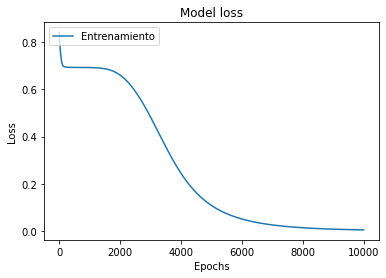

In [24]:
#Visualización de accuracy
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Entrenamiento'], loc='upper left')
#plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

In [25]:
#Cargar pesos y la arquitectura
model2=cargarRNN(nombreArchivoRedNeuronal) 

model2.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['acc']) #ADADELTA: An Adaptive Learning Rate Method
score = model2.evaluate(X_train, y_train, verbose=0)
print('Resultado en Train:')
print("%s: %.2f%%" % (model2.metrics_names[1], score[1]*100))

#Fase de Testing
print('Resultado en Test:')
score = model2.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model2.metrics_names[1], score[1]*100))

Red Neuronal Cargada desde Archivo
Resultado en Train:
acc: 100.00%
Resultado en Test:
acc: 100.00%


In [26]:
import pandas as pd
np.set_printoptions(formatter={'float': lambda X: "{0:0.4f}".format(X)})
#nuevo_X=[[1,1,0,0]]
nuevo_X=X_test
predicciones=model2.predict(nuevo_X)
print(predicciones)
y_pred = (model2.predict(nuevo_X) >= 0.5).astype("int32")
y_pred = y_pred.flatten()# de 2D a 1D
y_test1D=y_test.flatten()
dataframeFinal=pd.DataFrame({'real':y_test1D, 'predicción': y_pred})
dataframeFinal.head(16)

1/1 [==============================] - 0s 129ms/step
[[0.0001]
 [0.9996]
 [1.0000]
 [0.0001]
 [1.0000]
 [0.0012]
 [0.0001]
 [0.9990]
 [0.9996]
 [0.0006]
 [0.0016]
 [0.9819]
 [0.0001]
 [0.9837]
 [0.9990]
 [0.0342]]
1/1 [==============================] - 0s 30ms/step


real  predicción
0      0           0
1      1           1
2      1           1
3      0           0
4      1           1
5      0           0
6      0           0
7      1           1
8      1           1
9      0           0
10     0           0
11     1           1
12     0           0
13     1           1
14     1           1
15     0           0

In [28]:
def predecir(nuevo_X):
    y_pred = (model2.predict(nuevo_X) >= 0.5).astype("int32")
    y_pred = y_pred.flatten()# de 2D a 1D
    return y_pred
nuevo_X=[[1,1,0,0]]
prediccion=predecir(nuevo_X)
print(prediccion)

1/1 [==============================] - 0s 50ms/step
[0]
